## Connecting To Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Importing libraries

In [ ]:
# Importing The Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import OLSInfluence

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Read The CSV Files

#### Quarterly Data

In [ ]:
# Read quarterly_data
quarterly_data_path = "/content/drive/MyDrive/databusters/Quarterly Data.csv"
quarterly_data = pd.read_csv(quarterly_data_path, header=0, skiprows=[1,2])
quarterly_data.head()

,sasdate,GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,...,TNWMVBSNNCBBDIx,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P div yield,S&P PE ratio
0,3/1/1959,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,...,1341.67,333245.24,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211
1,6/1/1959,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,...,1294.15,345845.01,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899
2,9/1/1959,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,...,1320.72,354808.05,275139.48,2434604.03,2079.21,1612.34,128.9557,58.7300,3.0720,18.9544
3,12/1/1959,3439.832,2094.495,69.1573,1430.8157,701.7617,369.442,367.6452,50.7342,180.2333,...,1165.65,349400.81,254967.79,2429055.21,2079.05,1517.14,137.0372,57.7633,3.1572,17.8221
4,3/1/1960,3517.181,2114.532,71.3815,1443.7405,703.5338,406.581,379.9162,52.4985,186.4967,...,1327.63,362821.95,278692.55,2451394.44,2087.97,1603.82,130.1872,56.2767,3.3850,16.8284


#### Monthly Data

In [ ]:
# Read monthly_data
monthly_data_path = "/content/drive/MyDrive/databusters/Monthly Data.csv"
monthly_data = pd.read_csv(monthly_data_path, header=0, skiprows=[1])
monthly_data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1/1/1959,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1,2/1/1959,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
2,3/1/1959,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
3,4/1/1959,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
4,5/1/1959,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5476,24.3911,23.1161,32.5567,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 1: Data Cleaning

When the two datasets - `quarterly_data.csv` and `monthly_data.csv` are viewed, we observe that there are **246 columns** for the `quarterly_data` and **127 columns** for the `monthly_data`. The number of columns is too many for training the Machine Learning model. Having too many features might cause the Machine Learning model implemented subsequently to overfit, causing the accuracy of the model to be low for the test dataset.

In order to overcome the problem of overfitting, we need to reduce the number of features (number of columns) of the datasets. Before removing the columns, we need to examine each column of the datasets and extracting the most important and relevant ones for analysis and Machine Learning model implementation.

Most Important Columns:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            border: 1px solid black;
            padding: 10px;
            text-align: center;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th>Original Column ID</th>
                <th>Fred Mnemonic (Column Name)</th>
                <th>Description Of Column</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>1</td>
                <td>GDPC1</td>
                <td>Real Gross Domestic Product</td>
            </tr>
            <tr>
                <td>2</td>
                <td>PCECC96</td>
                <td>Real Personal Consumption Expenditures</td>
            </tr>
            <tr>
                <td>7</td>
                <td>FPIx</td>
                <td>Real Private Fixed Investment</td>
            </tr>
            <tr>
                <td>14</td>
                <td>FGRECPTx</td>
                <td>Real Federal Government Current Receipts</td>
            </tr>
            <tr>
                <td>16</td>
                <td>EXPGSC1</td>
                <td>Real Exports of Goods & Services</td>
            </tr>
            <tr>
                <td>17</td>
                <td>IMPGSC1</td>
                <td>Real Imports of Goods & Services</td>
            </tr>
            <tr>
                <td>18</td>
                <td>DPIC96</td>
                <td>Real Disposable Personal Income</td>
            </tr>
            <tr>
                <td>22</td>
                <td>INDPRO</td>
                <td>Industrial Production Index</td>
            </tr>
            <tr>
                <td>33</td>
                <td>TCU</td>
                <td>Capacity Utilization</td>
            </tr>
            <tr>
                <td>59</td>
                <td>UNRATE</td>
                <td>Civilian Unemployment Rate</td>
            </tr>
            <tr>
                <td>80</td>
                <td>HWIx</td>
                <td>Help-Wanted Index</td>
            </tr>
            <tr>
                <td>81</td>
                <td>HOUST</td>
                <td>New Privately Owned Housing Units Started</td>
            </tr>
            <tr>
                <td>88</td>
                <td>CMRMTSPLx</td>
                <td>Real Manufacturing and Trade Industries Sales</td>
            </tr>
            <tr>
                <td>89</td>
                <td>RSAFSx</td>
                <td>Real Retail and Food Services Sales</td>
            </tr>
            <tr>
                <td>97</td>
                <td>GDPCTPI</td>
                <td>Gross Domestic Product: Chain-type Price Index</td>
            </tr>
            <tr>
                <td>120</td>
                <td>CPIAUCSL</td>
                <td>Consumer Price Index for All Urban Consumers: All Items</td>
            </tr>
            <tr>
                <td>123</td>
                <td>PPIACO</td>
                <td>Producer Price Index for All Commodities</td>
            </tr>
            <tr>
                <td>144</td>
                <td>FEDFUNDS</td>
                <td>Effective Federal Funds Rate</td>
            </tr>
            <tr>
                <td>168</td>
                <td>TOTALSLx</td>
                <td>Total Consumer Credit Outstanding</td>
            </tr>
            <tr>
                <td>178</td>
                <td>VIXCLSx</td>
                <td>CBOE Volatility Index: VIX</td>
            </tr>
            <tr>
                <td>182</td>
                <td>TWEXAFEGSMTHx</td>
                <td>All-Transactions House Price Index</td>
            </tr>
            <tr>
                <td>188</td>
                <td>UMCSENTx</td>
                <td>Consumer Sentiment</td>
            </tr>
            <tr>
                <td>189</td>
                <td>USEPUINDXM</td>
                <td>Economic Policy Uncertainty Index</td>
            </tr>
            <tr>
                <td>190</td>
                <td>B020RE1Q156NBEA</td>
                <td>Shares of GDP: Exports of goods and services</td>
            </tr>
            <tr>
                <td>191</td>
                <td>B021RE1Q156NBEA</td>
                <td>Shares of GDP: Imports of goods and services</td>
            </tr>
            <tr>
                <td>193</td>
                <td>GFDEBTNx</td>
                <td>Real Federal Debt: Total Public Debt</td>
            </tr>
            <tr>
                <td>223</td>
                <td>ISRATIOx</td>
                <td>Inventories to Sales Ratio</td>
            </tr>
            <tr>
                <td>231</td>
                <td>NIKKEI225</td>
                <td>Nikkei Stock Average</td>
            </tr>
            <tr>
                <td>232</td>
                <td>NASDAQCOM</td>
                <td>NASDAQ Compositet</td>
            </tr>
            <tr>
                <td>244</td>
                <td>CNCFx</td>
                <td>Real Disposable Business Income</td>
            </tr>
            <tr>
                <td>245</td>
                <td>S&P 500</td>
                <td>S&P's Common Stock Price Index</td>
            </tr>
        </tbody>
    </table>
</body>
</html>


These are the most important columns that we have extracted to be used for the Machine Learning model. From the initial **246 columns** in the original `quarterly_data` dataset, the compressed dataset only has **32 columns**, which is much more suitable to be used for Machine Learning **with a lesser probability of overfitting to occur**.

However, **some of the removed columns for the Machine Learning model will still be used for data visualizations and analysis**.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 1.1: Removing The Less Important Columns Of Dataset

We will proceed to remove the less important columns of the quarterly_data dataset. We can use indexing of the column names to extract the important columns.

In [ ]:
# Extracting the most important columns
df_model = quarterly_data[['sasdate', 'GDPC1', 'PCECC96', 'FPIx', 'FGRECPTx',
                           'EXPGSC1', 'IMPGSC1', 'DPIC96', 'INDPRO', 'TCU',
                           'UNRATE', 'HWIx', 'HOUST', 'CMRMTSPLx', 'RSAFSx',
                           'GDPCTPI', 'CPIAUCSL', 'PPIACO', 'FEDFUNDS',
                           'TOTALSLx', 'VIXCLSx', 'TWEXAFEGSMTHx', 'UMCSENTx',
                           'USEPUINDXM', 'B020RE1Q156NBEA', 'B021RE1Q156NBEA',
                           'GFDEBTNx', 'ISRATIOx', 'NIKKEI225', 'NASDAQCOM',
                           'CNCFx', 'S&P 500']]

# Displaying the first few columns
df_model.head()

,sasdate,GDPC1,PCECC96,FPIx,FGRECPTx,EXPGSC1,IMPGSC1,DPIC96,INDPRO,TCU,...,UMCSENTx,USEPUINDXM,B020RE1Q156NBEA,B021RE1Q156NBEA,GFDEBTNx,ISRATIOx,NIKKEI225,NASDAQCOM,CNCFx,S&P 500
0,3/1/1959,3352.129,2039.017,357.0174,556.0802,89.697,115.440,2327.444,22.3558,NaN,...,NaN,NaN,4.3,4.2,NaN,1.5428,708.7090,NaN,124.9663,55.5167
1,6/1/1959,3427.667,2070.508,368.0640,578.9494,88.981,121.057,2364.977,23.4400,NaN,...,95.3,NaN,4.2,4.3,NaN,1.5256,780.3647,NaN,126.5305,57.5067
2,9/1/1959,3430.057,2092.138,371.9585,564.7381,97.562,122.212,2361.784,22.4813,NaN,...,NaN,NaN,4.6,4.4,NaN,1.5772,862.0388,NaN,128.9557,58.7300
3,12/1/1959,3439.832,2094.495,367.6452,566.5192,92.734,119.109,2378.605,22.5888,NaN,...,93.8,NaN,4.4,4.3,NaN,1.5807,935.7090,NaN,137.0372,57.7633
4,3/1/1960,3517.181,2114.532,379.9162,618.3418,104.686,123.608,2406.059,23.9508,NaN,...,100.0,NaN,4.8,4.3,NaN,1.5738,984.4690,NaN,130.1872,56.2767


----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 1.2: Renaming The Column Names Of The Modified Dataset

All of the column names are not in readable formats, almost every letter in the column names are capital letters, which are not recommended as labels for the column names. We should rename the column names to more readable formats. We can rename the column by using the `.rename(columns = {})` method.

In [ ]:
# Renaming the columns to more readable formats

df_model = df_model.rename(columns = {'sasdate': 'date',
                                      'GDPC1': 'real_gdp',
                                      'PCECC96': 'total_consumption',
                                      'FPIx': 'fixed_investment',
                                      'FGRECPTx': 'gov_receipts',
                                      'EXPGSC1': 'real_exports',
                                      'IMPGSC1': 'real_imports',
                                      'DPIC96': 'disposable_income',
                                      'INDPRO': 'production_index',
                                      'TCU': 'capacity_util',
                                      'UNRATE': 'unemployed_rate',
                                      'HWIx': 'help_wanted_index',
                                      'HOUST': 'housing_units',
                                      'CMRMTSPLx': 'manu_trade_sales',
                                      'RSAFSx': 'retail_food_sales',
                                      'GDPCTPI': 'gdp_chain',
                                      'CPIAUCSL': 'cpi',
                                      'PPIACO': 'ppi',
                                      'FEDFUNDS': 'federal_rate',
                                      'TOTALSLx': 'credit_outstanding',
                                      'VIXCLSx': 'vix_price',
                                      'TWEXAFEGSMTHx': 'house_price_index',
                                      'UMCSENTx': 'consumer_sentiment',
                                      'USEPUINDXM': 'policy_uncertainty',
                                      'B020RE1Q156NBEA': 'gdp_export_share',
                                      'B021RE1Q156NBEA': 'gdp_import_share',
                                      'GFDEBTNx': 'public_debt',
                                      'ISRATIOx': 'inventory_sales_ratio',
                                      'NIKKEI225': 'nikkei_price',
                                      'NASDAQCOM': 'nasdaq_price',
                                      'CNCFx': 'disposable_business_income',
                                      'S&P 500': 'sp500_price'})

# Displaying the first few columns
df_model.head()

,date,real_gdp,total_consumption,fixed_investment,gov_receipts,real_exports,real_imports,disposable_income,production_index,capacity_util,...,consumer_sentiment,policy_uncertainty,gdp_export_share,gdp_import_share,public_debt,inventory_sales_ratio,nikkei_price,nasdaq_price,disposable_business_income,sp500_price
0,3/1/1959,3352.129,2039.017,357.0174,556.0802,89.697,115.440,2327.444,22.3558,NaN,...,NaN,NaN,4.3,4.2,NaN,1.5428,708.7090,NaN,124.9663,55.5167
1,6/1/1959,3427.667,2070.508,368.0640,578.9494,88.981,121.057,2364.977,23.4400,NaN,...,95.3,NaN,4.2,4.3,NaN,1.5256,780.3647,NaN,126.5305,57.5067
2,9/1/1959,3430.057,2092.138,371.9585,564.7381,97.562,122.212,2361.784,22.4813,NaN,...,NaN,NaN,4.6,4.4,NaN,1.5772,862.0388,NaN,128.9557,58.7300
3,12/1/1959,3439.832,2094.495,367.6452,566.5192,92.734,119.109,2378.605,22.5888,NaN,...,93.8,NaN,4.4,4.3,NaN,1.5807,935.7090,NaN,137.0372,57.7633
4,3/1/1960,3517.181,2114.532,379.9162,618.3418,104.686,123.608,2406.059,23.9508,NaN,...,100.0,NaN,4.8,4.3,NaN,1.5738,984.4690,NaN,130.1872,56.2767


----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 1.3: Finding NA Values And Handling Them

When the dataset is displayed, we notice that certain columns such as `capacity_util`, `policy_uncertainty`, `public_debt` and `nasdaq_price` contains `NA` values. Let us examine the number of NA values for each column of the dataset. We can use the `.isna().sum()` method on the dataset.

In [ ]:
# Finding the number of NA values in each column of the dataset
print("Number Of NA Values For Each Column: ")
print("\n")
print(df_model.isna().sum())

Number Of NA Values For Each Column: 


date                            0
real_gdp                        0
total_consumption               0
fixed_investment                0
gov_receipts                    0
real_exports                    0
real_imports                    0
disposable_income               0
production_index                0
capacity_util                  32
unemployed_rate                 0
help_wanted_index               0
housing_units                   0
manu_trade_sales               32
retail_food_sales             132
gdp_chain                       0
cpi                             0
ppi                             0
federal_rate                    0
credit_outstanding              0
vix_price                      14
house_price_index             188
consumer_sentiment              2
policy_uncertainty            104
gdp_export_share                0
gdp_import_share                0
public_debt                    28
inventory_sales_ratio           0
nikkei_p

We notice that a significant proportion of columns contains `NA` values.

1) `capacity_util` : 32 `NA` values

2) `manu_trade_sales`: 32 `NA` values

3) `retail_food_sales`: 132 `NA` values

4) `vix_price`: 14 `NA` values

5) `house_price_index`: 188 `NA` values

6) `consumer_sentiment`: 2 `NA` values

7) `policy_uncertainty`: 104 `NA` values

8) `public_debt`: 28 `NA` values

9) `nasdaq_price`: 48 `NA` values

There are two methods that we can consider handling the missing NA values: **imputation** or **deletion**.

However, for imputation, it is generally not recommended in this context. This is becuase variables such as `vix_price`, `nasdaq_price` and `public_debt` are dynamic in nature and it is very difficult to estimate the values. Furthermore, for most columns, the `NA` values are usually in front (dates back to a long time ago in 1960 to 1980) and are continuous, meaning that `NA` values are in a row (eg. row 2 to row 10 all contain `NA` values, but subsequently have values from row 11 onwards). This makes it even more challenging to predict prices considering that too many values are missing.

Hence, the more effective and sensible approach is to remove all rows containing `NA` values. We can use the `.dropna()` method in Python to remove all the rows with `NA` values.

In [ ]:
# Removing all rows containing NA values
df_model = df_model.dropna()

# Displaying the first few columns
df_model.head()

,date,real_gdp,total_consumption,fixed_investment,gov_receipts,real_exports,real_imports,disposable_income,production_index,capacity_util,...,consumer_sentiment,policy_uncertainty,gdp_export_share,gdp_import_share,public_debt,inventory_sales_ratio,nikkei_price,nasdaq_price,disposable_business_income,sp500_price
188,3/1/2006,16353.835,10883.075,2842.7110,2986.5821,1568.985,2289.138,11700.733,98.2290,80.6832,...,88.9,72.0326,10.4,16.2,10010829.8,1.2567,16200.5121,2288.7963,1454.9992,1283.0400
189,6/1/2006,16396.151,10939.498,2827.5385,3002.8317,1598.092,2311.934,11744.340,98.8099,80.7679,...,83.8,76.6974,10.6,16.4,9981675.1,1.2733,16143.4018,2235.7805,1420.1131,1281.7833
190,9/1/2006,16420.738,11009.748,2809.4000,3033.4742,1596.037,2335.034,11761.357,99.2015,80.6186,...,84.0,73.4666,10.6,16.6,10012681.0,1.2933,15630.6149,2140.8200,1429.0901,1288.3767
191,12/1/2006,16561.866,11114.771,2789.3911,3055.0315,1656.573,2332.033,11904.732,99.4439,80.2667,...,92.5,63.1182,10.9,16.2,10233458.3,1.3033,16476.1968,2388.6460,1434.3432,1389.4800
192,3/1/2007,16611.690,11183.323,2786.8646,3104.8812,1689.392,2365.980,11995.959,100.4555,80.5114,...,92.2,68.7032,11.1,16.3,10338756.0,1.2967,17376.5976,2442.8518,1297.2634,1425.3033


We now observe that the dataset has no more `NA` values, and the first row of the modified dataset is equivalent to the **188th row** of the original dataset before the rows containing `NA` values are removed. This corresponds to the column containing the most `NA` values - `house_price_index` which contains 188 `NA` values.

The dataset now contains information from **2006** onwards till **2024**, which is a much more sensible range to examine compared to handling values which are too long ago in the 20th century.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 1.4: Check For Any Duplicates In The Dataset

Next, we should check for any duplicates in the dataset. For duplicates, we should remove them and keep only one to ensure that all records are distinct. To check for any duplication, we can use the `.duplicated().sum()` method in Python and ensure that the output is equal to 0.

If the output is 0, it means that there are no duplicated rows but if the output value is non-zero, there are indeed duplicate rows in the dataset which needs to be dropped using the `.drop_duplicates()` method.

In [ ]:
# Check for duplicate rows in the dataset
model_duplicates = df_model.duplicated().sum()

# Print the results
print(f"Model Dataset: {model_duplicates} duplicate rows found")

Model Dataset: 0 duplicate rows found


We observe that for the dataset, 0 duplicate rows are found, which means that all the records of the dataset are distinct. Hence, we can proceed to the next step without needing to use the `.drop_duplicates()` method.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 1.5: Examing The Data Types Of The Dataset

We also need to examine the datatypes of the columns of the dataset and ensure that all columns are of the right datatype. Without the correct datatypes, calculations cannot be performed and plotted on the visualisations in subsequent steps. We can use the `.info()` method to view all the datatypes of the columns of the dataset.

In [ ]:
# Examining the datatypes of the dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 188 to 262
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        75 non-null     object 
 1   real_gdp                    75 non-null     float64
 2   total_consumption           75 non-null     float64
 3   fixed_investment            75 non-null     float64
 4   gov_receipts                75 non-null     float64
 5   real_exports                75 non-null     float64
 6   real_imports                75 non-null     float64
 7   disposable_income           75 non-null     float64
 8   production_index            75 non-null     float64
 9   capacity_util               75 non-null     float64
 10  unemployed_rate             75 non-null     float64
 11  help_wanted_index           75 non-null     int64  
 12  housing_units               75 non-null     float64
 13  manu_trade_sales            75 non-null

We notice that all the columns have `float64` datatype except for two columns. Since we are handling values/prices for all columns (except for `date`), a datatype of `float64` is considered suitable. For the column on `help_wanted_index`, an `int64` datatype is used. This is also suitable as all the values of the `help_wanted_index` column are integers without any decimal points.

However, the problem lies with the `date` column, where the datatype of the column is an `object`. This is not suitable as we are handling dates in the date column and thus should be of `datetime` datatype. We need to convert the `date` column from `object` to `datetime` datatype.



In [ ]:
# Convert the 'date' column to datetime
df_model['date'] = pd.to_datetime(df_model['date'])

# Displaying the first few rows
df_model.head()

,date,real_gdp,total_consumption,fixed_investment,gov_receipts,real_exports,real_imports,disposable_income,production_index,capacity_util,...,consumer_sentiment,policy_uncertainty,gdp_export_share,gdp_import_share,public_debt,inventory_sales_ratio,nikkei_price,nasdaq_price,disposable_business_income,sp500_price
188,2006-03-01,16353.835,10883.075,2842.7110,2986.5821,1568.985,2289.138,11700.733,98.2290,80.6832,...,88.9,72.0326,10.4,16.2,10010829.8,1.2567,16200.5121,2288.7963,1454.9992,1283.0400
189,2006-06-01,16396.151,10939.498,2827.5385,3002.8317,1598.092,2311.934,11744.340,98.8099,80.7679,...,83.8,76.6974,10.6,16.4,9981675.1,1.2733,16143.4018,2235.7805,1420.1131,1281.7833
190,2006-09-01,16420.738,11009.748,2809.4000,3033.4742,1596.037,2335.034,11761.357,99.2015,80.6186,...,84.0,73.4666,10.6,16.6,10012681.0,1.2933,15630.6149,2140.8200,1429.0901,1288.3767
191,2006-12-01,16561.866,11114.771,2789.3911,3055.0315,1656.573,2332.033,11904.732,99.4439,80.2667,...,92.5,63.1182,10.9,16.2,10233458.3,1.3033,16476.1968,2388.6460,1434.3432,1389.4800
192,2007-03-01,16611.690,11183.323,2786.8646,3104.8812,1689.392,2365.980,11995.959,100.4555,80.5114,...,92.2,68.7032,11.1,16.3,10338756.0,1.2967,17376.5976,2442.8518,1297.2634,1425.3033


In [ ]:
# Ensuring the datatype is changed correctly
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 188 to 262
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        75 non-null     datetime64[ns]
 1   real_gdp                    75 non-null     float64       
 2   total_consumption           75 non-null     float64       
 3   fixed_investment            75 non-null     float64       
 4   gov_receipts                75 non-null     float64       
 5   real_exports                75 non-null     float64       
 6   real_imports                75 non-null     float64       
 7   disposable_income           75 non-null     float64       
 8   production_index            75 non-null     float64       
 9   capacity_util               75 non-null     float64       
 10  unemployed_rate             75 non-null     float64       
 11  help_wanted_index           75 non-null     int64         
 12

The modified dataset is now cleaned, ready for analysis and to be implemented in the Machine Learning model.


*   Unnecessary columns removed
*   Column names correctly formatted into a user-friendly version
*   Correct data types of columns
*   All NA values are removed
*   All unique values and no duplicates







----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 2: Data Visualisations

#### Visualization 1: Comparing The Stock Prices Over Time

We can use our modified dataset `df_model` to compare the stock prices of VIX, Nikkei and Nasdaq (represented as `vix_price`, `nikkei_price` and `nasdaq_price`) over time from 2006 to 2024. We can also use this visualisation to identify the price trend of each stock over time, looking out for certain anomalies such as sudden up and down price movements.

For this visualization, we can consider using a **line graph** (three lines in a single line graph) to plot the stock price of each of the three stocks over time.

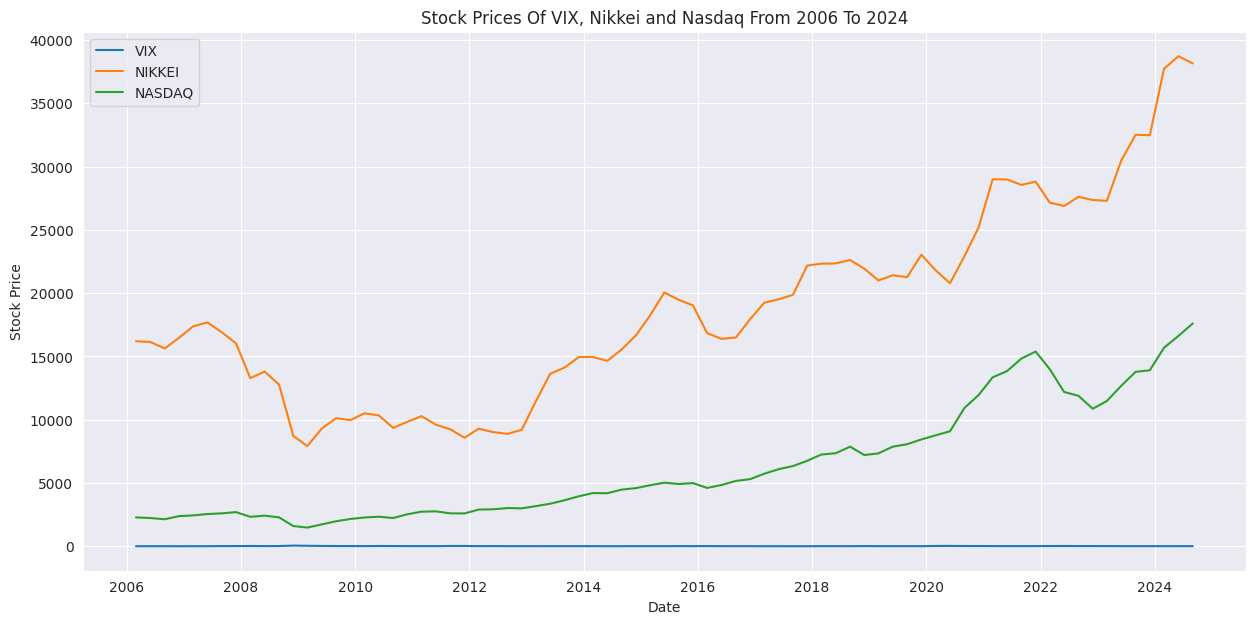

In [ ]:
# Extracting the relevant columns
df_stock_price = df_model[['date', 'vix_price', 'nikkei_price', 'nasdaq_price']]

# Plotting a line graph to illustrate stock prices over time

# Setting a relevant figure size
plt.figure(figsize = (15, 7))

# For each stock, plot a line on the graph (include labels for clarity)
plt.plot(df_stock_price['date'], df_stock_price['vix_price'], label = 'VIX')
plt.plot(df_stock_price['date'], df_stock_price['nikkei_price'], label = 'NIKKEI')
plt.plot(df_stock_price['date'], df_stock_price['nasdaq_price'], label = 'NASDAQ')

# Add the relevant labels, titles and legend
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Of VIX, Nikkei and Nasdaq From 2006 To 2024')
plt.legend()

# Display the plot
plt.show()

We observe that there are indeed many fluctuations of the stock prices of Nikkei and Nasdaq from 2006 to 2024. There are periods of time when stock prices decreased significantly (bear periods) and other periods of time when stock prices increased considerably (bull periods). Also, we notice that the trends of Nikkei and Nasdaq are quite similar, where the stock prices increase or decrease in tandem.

For instance, from 2007 to 2009, the stock prices of both Nikkei and Nasdaq decreased significantly (Likely due to the 2007 to 2009 Great Recession). Afterwards from 2010 to 2022, both Nikkei and Nasdaq stock prices increase. However, the stock prices of both Nikkei and Nasdaq decrease again from 2022 to 2023 (Possibly due to certain events such as surging GDP growth which kept interest rates high or the Russia-Ukraine war).

We can use some color encoding to mark the ranges where the stock prices are fast increasing and fast decreasing using the `plt.axvspan` method in `matplotlib`.

Stock Prices Fast Increasing -> Encoded in **Green**

Stock Prices Fast Decreasing -> Encoded in **Red**

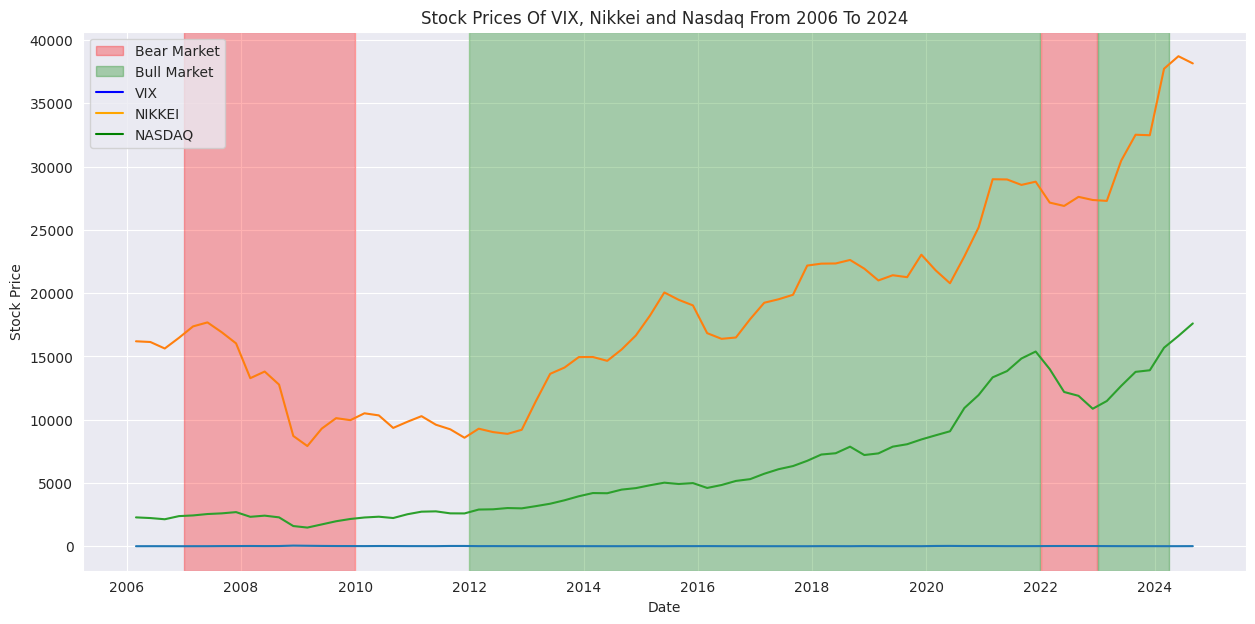

In [ ]:
import matplotlib.patches as mpatches

# Setting a relevant figure size
plt.figure(figsize = (15, 7))

# For each stock, plot a line on the graph (include labels for clarity)
plt.plot(df_stock_price['date'], df_stock_price['vix_price'], label = 'VIX')
plt.plot(df_stock_price['date'], df_stock_price['nikkei_price'], label = 'NIKKEI')
plt.plot(df_stock_price['date'], df_stock_price['nasdaq_price'], label = 'NASDAQ')

# Highlighting the various bull and bear periods in green and red respectively
plt.axvspan('2007-01-01', '2009-12-31', color = 'red', alpha = 0.3)
plt.axvspan('2012-01-01', '2021-12-31', color = 'green', alpha = 0.3)
plt.axvspan('2022-01-01', '2022-12-31', color = 'red', alpha = 0.3)
plt.axvspan('2023-01-01', '2024-03-31', color = 'green', alpha = 0.3)

# Creating custom legend handles for bull and bear markets
bear_patch = mpatches.Patch(color='red', alpha=0.3, label='Bear Market')
bull_patch = mpatches.Patch(color='green', alpha=0.3, label='Bull Market')

# Add the relevant labels, titles and legend
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Of VIX, Nikkei and Nasdaq From 2006 To 2024')
plt.legend(handles = [bear_patch, bull_patch,
                      plt.Line2D([0], [0], color='blue', label='VIX'),
                    plt.Line2D([0], [0], color='orange', label='NIKKEI'),
                    plt.Line2D([0], [0], color='green', label='NASDAQ')])

# Display the plot
plt.show()

From the graph plotted, we notice that the bull and bear periods of both Nikkei and Nasdaq are:

Bull Periods:
*   **From 2012 to 2022**
*   **From 2023 to 2024**

Bear Periods:
*   **From 2007 to 2009**
*   **From 2022 to 2023**

However for VIX, we cannot determine directly from the graph about the stock price trend and anomalies as the stock price of VIX is always much lower compared to Nikkei and Nasdaq. We probably need to **use a separate graph to plot the stock price of VIX by itself from 2006 to 2024**.

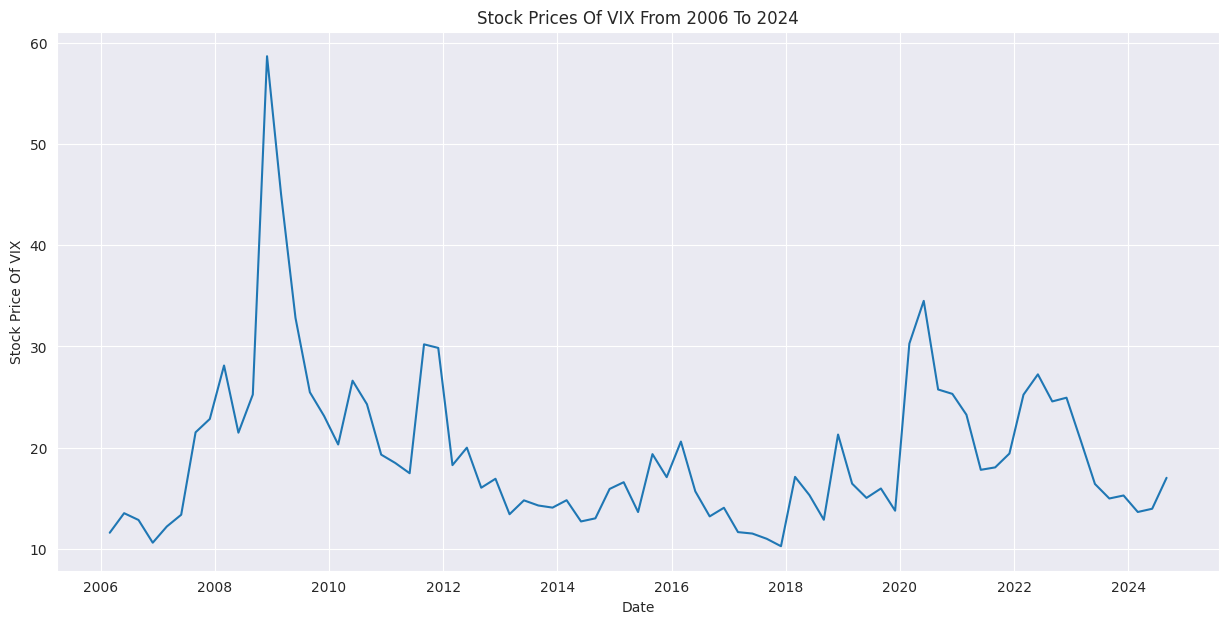

In [ ]:
# Setting a relevant figure size
plt.figure(figsize = (15, 7))

# Plotting the line graph of VIX
plt.plot(df_stock_price['date'], df_stock_price['vix_price'])

# Add the relevant labels, titles and legend
plt.xlabel('Date')
plt.ylabel('Stock Price Of VIX')
plt.title('Stock Prices Of VIX From 2006 To 2024')

# Display the plot
plt.show()

When the VIX graph is plotted, we notice that the stock price trend of VIX over time is quite different (almost opposite) to the stock price trend of Nikkei and Nasdaq, which means that generally, as the stock prices of Nikkei and Nasdaq increase, the stock price of VIX will decrease in the same period of time and vice versa.

Comparing the two graphs plotted:

1) From Years 2007 to 2009: Stock prices of Nikkei and Nasdaq decreases significantly but stock price of VIX increases significantly.

2) From Years 2009 to 2018: Stock prices of Nikkei and Nasdaq generally increases but stock price of VIX generally decreases.

3) From Years 2022 to 2023: Stock prices of Nikkei and Nasdaq generally decreases but stock price of VIX generally increases.

4) From Years 2023 to 2024: Stock prices of Nikkei and Nasdaq generally increases but stock price of VIX generally decreases.

We can use the same color encoding method to mark the ranges where the stock prices are fast increasing and fast decreasing for VIX using the `plt.axvspan` method in `matplotlib`.

Stock Prices Fast Increasing -> Encoded in **Green**

Stock Prices Fast Decreasing -> Encoded in **Red**

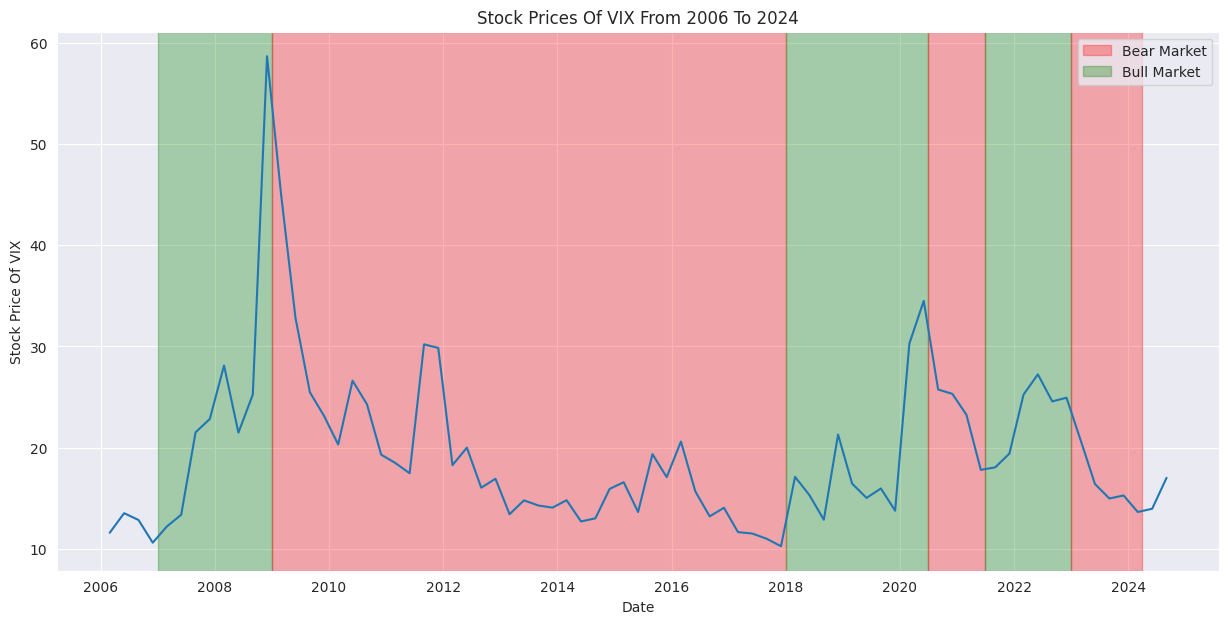

In [ ]:
# Setting a relevant figure size
plt.figure(figsize = (15, 7))

# For each stock, plot a line on the graph
plt.plot(df_stock_price['date'], df_stock_price['vix_price'])

# Highlighting the various bull and bear periods in green and red respectively
plt.axvspan('2007-01-01', '2009-01-01', color = 'green', alpha = 0.3)
plt.axvspan('2009-01-01', '2018-01-01', color = 'red', alpha = 0.3)
plt.axvspan('2018-01-01', '2020-06-30', color = 'green', alpha = 0.3)
plt.axvspan('2020-06-30', '2021-06-30', color = 'red', alpha = 0.3)
plt.axvspan('2021-06-30', '2023-01-01', color = 'green', alpha = 0.3)
plt.axvspan('2023-01-01', '2024-03-31', color = 'red', alpha = 0.3)

# Creating custom legend handles for bull and bear markets
bear_patch = mpatches.Patch(color='red', alpha=0.3, label='Bear Market')
bull_patch = mpatches.Patch(color='green', alpha=0.3, label='Bull Market')

# Add the relevant labels, titles and legend
plt.xlabel('Date')
plt.ylabel('Stock Price Of VIX')
plt.title('Stock Prices Of VIX From 2006 To 2024')
plt.legend(handles = [bear_patch, bull_patch])

# Display the plot
plt.show()

To undestand the trend of Nikkei, Nasdaq and VIX and why VIX's trend is quite opposite to Nikkei and Nasdaq, we need to first understand the VIX, Nikkei and Nasdaq markets more in-depth.

What the three stocks represent:

*   **Nikkei**: Japan's stock index (equity market)
*   **Nasdaq**: US tech-heavy index (equity market)
*   **VIX**: Volatility Index, also called the "Fear Index"

***Why Nikkei and Nasdaq have similar stock price trends?***

Both Nikkei (Japan's stock index) and Nasdaq (US tech-heavy index) represent equity markets, which tend to follow global economic cycles. Stock markets generally rise during bull markets (economic growth, low interest rates, strong earnings) and decline during bear markets (recessions, high interest rates, financial crises). Investors tend to allocate capital to equities (stocks) when they are optimistic, driving both indices higher and hence similar stock price trends over time.

***Why VIX stock price moves in the opposite direction to Nikkei & Nasdaq?***

The VIX (Volatility Index, also called the "Fear Index") measures market volatility based on S&P 500 options. It tends to spike when markets fall and decline when markets rise because investors buy protective put options (hedges) during uncertain times. When many investors buy puts, market makers (who sell these options) hedge their exposure by short-selling stocks (selling stocks they don't own). This increased short-selling pressure pushes stock prices down.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Visualization 2: Comparing Imports And Exports Of Goods And Services Over Time

Another possible visualization that we can delve into is the amount of imports and exports of Goods and Service in the United States over time from 2006 to 2024. We can visualise the trend of imports and exports by plotting a line graph.

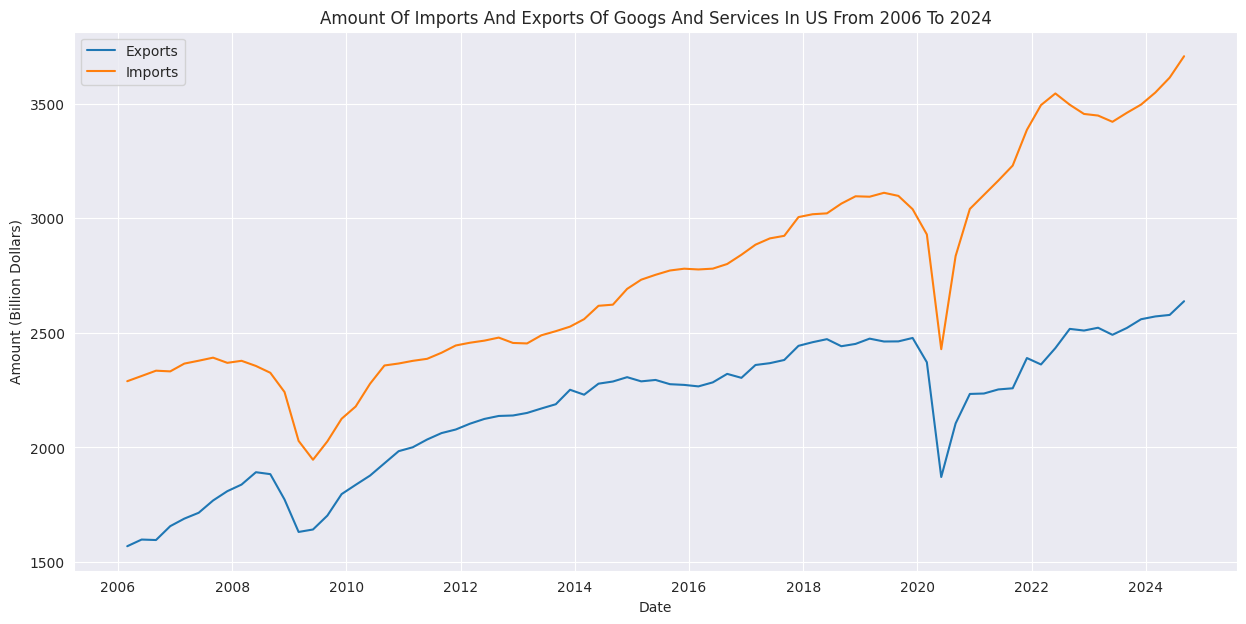

In [ ]:
# Extracting the relevant columns
df_port_flow = df_model[['date', 'real_exports', 'real_imports']]

# Plotting a line graph to illustrate stock prices over time

# Setting a relevant figure size
plt.figure(figsize = (15, 7))

# Plot a line on the graph (include labels for clarity) for both imports and exports
plt.plot(df_port_flow['date'], df_port_flow['real_exports'], label = 'Exports')
plt.plot(df_port_flow['date'], df_port_flow['real_imports'], label = 'Imports')

# Add the relevant labels, titles and legend
plt.xlabel('Date')
plt.ylabel('Amount (Billion Dollars)')
plt.title('Amount Of Imports And Exports Of Googs And Services In US From 2006 To 2024')
plt.legend()

# Display the plot
plt.show()

Observations From The Graph Plotted:

1) The **imports** (orange line) are consistently higher than **exports** (blue line) throughout the time period, indicating a **trade deficit** in the US.

2) Both imports and exports generally follow an upward trend, with periodic fluctuations during certain years. There are some significant decrease in both exports and imports such as between years 2008 and 2009 and between years 2019 and 2021.

3) The gap between imports and exports widens over time from 2008 to 2024, suggesting that the rate of increase of imports is higher compared to the rate of increase in exports from 2008 to 2024.

Possible Reasons As To Why This Trend Occur:

**2008-2009 Financial Crisis Impact:**
A noticeable decline in both imports and exports around 2008-2009.
Imports drop more sharply compared to exports, indicating a significant reduction in demand for foreign goods.

**Recovery Period (2010-2019):**
Both imports and exports show a steady increase from 2010 onwards.
The increase is gradual but steady, reflecting economic recovery and global trade growth.

**COVID-19 Pandemic Impact (2020):**
A sharp dip in both imports and exports around 2020.
Exports experience a steeper drop than imports, potentially due to disruptions in global supply chains.

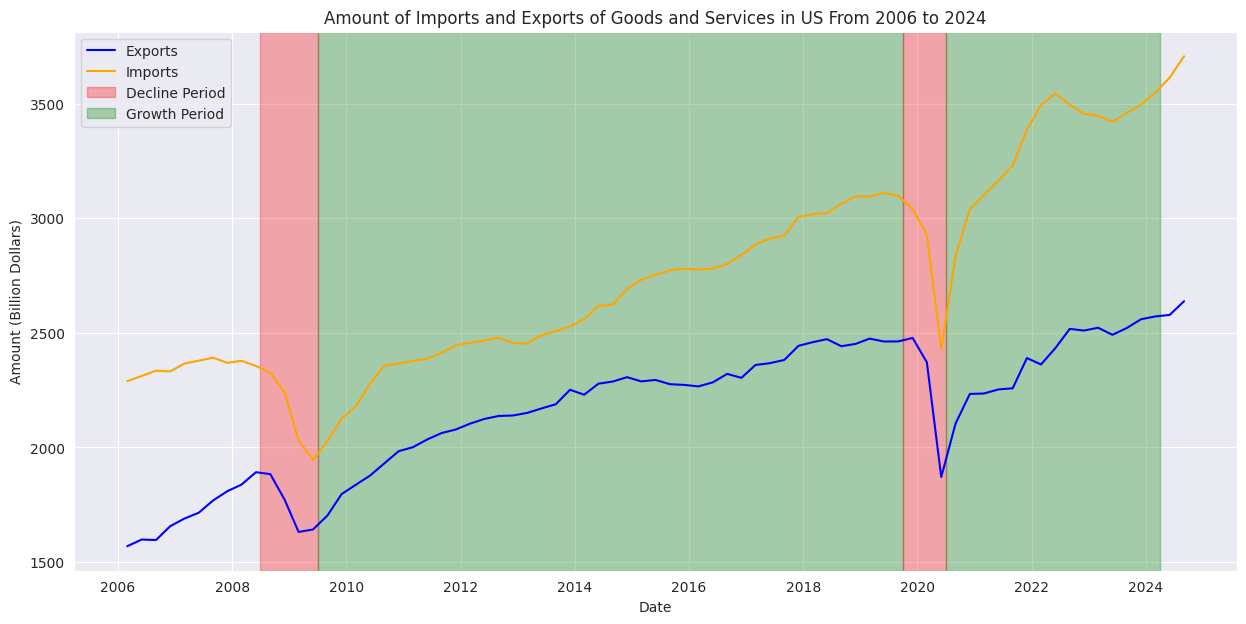

In [ ]:
# Extract relevant columns
df_port_flow = df_model[['date', 'real_exports', 'real_imports']]

# Setting a relevant figure size
plt.figure(figsize=(15, 7))

# Plot a line on the graph (include labels for clarity) for both imports and exports
plt.plot(df_port_flow['date'], df_port_flow['real_exports'], label='Exports', color='blue')
plt.plot(df_port_flow['date'], df_port_flow['real_imports'], label='Imports', color='orange')

# Highlight periods of increase and decrease (example time ranges)
plt.axvspan('2008-06-30', '2009-06-30', color='red', alpha=0.3, label='Decline Period')
plt.axvspan('2009-06-30', '2019-09-30', color='green', alpha=0.3, label='Growth Period')
plt.axvspan('2019-09-30', '2020-06-30', color='red', alpha=0.3)
plt.axvspan('2020-06-30', '2024-03-31', color='green', alpha=0.3)

# Add the relevant labels, titles, and legend
plt.xlabel('Date')
plt.ylabel('Amount (Billion Dollars)')
plt.title('Amount of Imports and Exports of Goods and Services in US From 2006 to 2024')
plt.legend()

# Display the plot
plt.show()


----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Visuaization 3: Comparing The Real Disposable Personal Income Trend Over Time

Next, we can measure and gauge the trend of people's real disposable income trend over time from 2006 to 2024 using a line chart.

Real disposable income is the amount of money a person has left to spend or save after paying taxes and adjusting for inflation. The value of real disposable income tells us how much money one can actually afford to spend on things like food, rent, entertainment, or savings, considering the rising cost of living in the US.



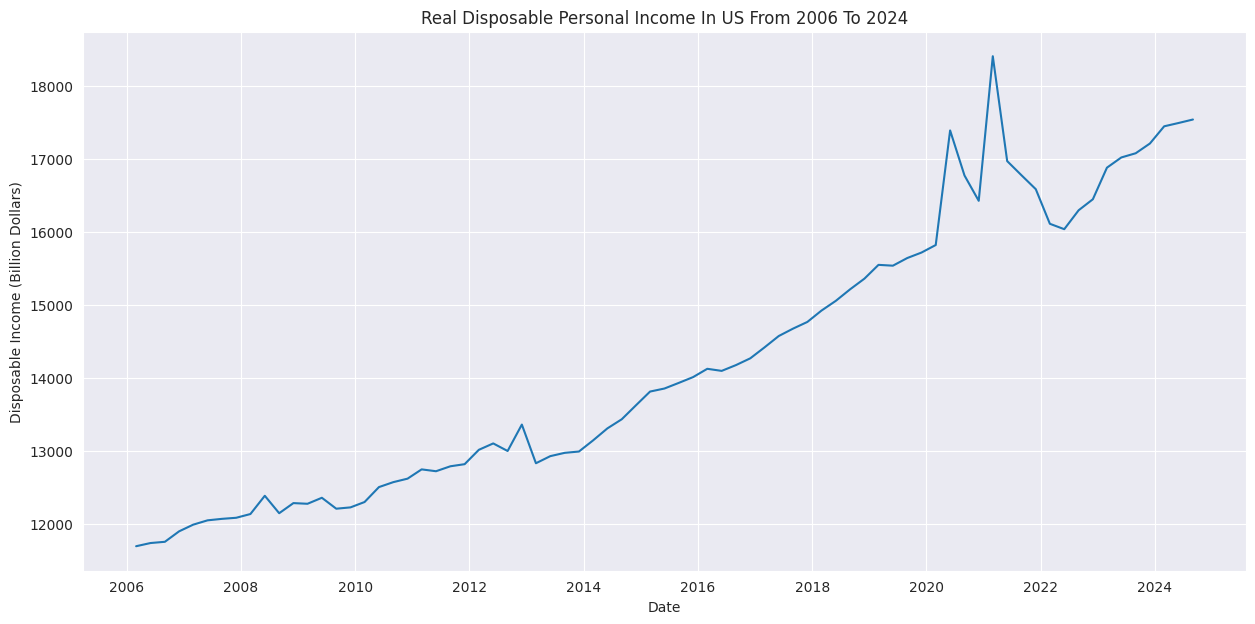

In [ ]:
# Extracting the relevant columns
df_disposable_income = df_model[['date', 'disposable_income']]

# Setting a relevant figure size
plt.figure(figsize=(15, 7))

# Plot a line on the graph for the disposable income in the US
plt.plot(df_disposable_income['date'], df_disposable_income['disposable_income'])

# Add the relevant labels, titles, and legend
plt.xlabel('Date')
plt.ylabel('Disposable Income (Billion Dollars)')
plt.title('Real Disposable Personal Income In US From 2006 To 2024')

# Display the plot
plt.show()

Observations From The Graph Plotted:

Overall, the trend is relatively stable. However, there are noticeable anomalies where disposable income experiences sharp increases and decreases.

There are several large spikes and dips in the real disposable income for several periods from 2006 to 2024.

*   Between 2012 and 2014
*   Between 2020 and 2023 (especially large multiple spikes and dips)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Possible Reasons For The Large Spikes And Dips:

**For between 2012 and 2014:**
The sharp spikes and dips in real disposable income during 2012–2014 were primarily driven by tax policy changes and the uneven economic recovery following the Great Recession. The expiration of the Bush-era tax cuts and the Payroll Tax Holiday in 2013 significantly increased taxes for many households, leading to a noticeable dip in disposable income. At the same time, the gradual recovery in employment and wages contributed to periodic increases, though these gains were inconsistent.

**For between 2020 and 2023:**
The unprecedented spikes and dips in disposable income from 2020 to 2023 were largely influenced by the COVID-19 pandemic and its economic consequences. Government stimulus programs, such as direct payments, enhanced unemployment benefits, and expanded child tax credits, caused sharp spikes in 2020 and early 2021. However, as these programs expired and inflation surged due to supply chain disruptions and global tensions, disposable income dropped significantly.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Other Reasons:

*   **Economic Recession** - Job losses and wage cuts reduce household incomes
*   **High Inflation Rates** - Inflation erodes the value of money, meaning the same amount of income buys fewer goods and services
*   **Policy Changes** - Government fiscal policies like tax increases or reductions in stimulus programs can reduce disposable income
*   **Unemployment and Labor Market Shocks** - Mass layoffs or reduced working hours lead to lower incomes, affecting overall disposable income






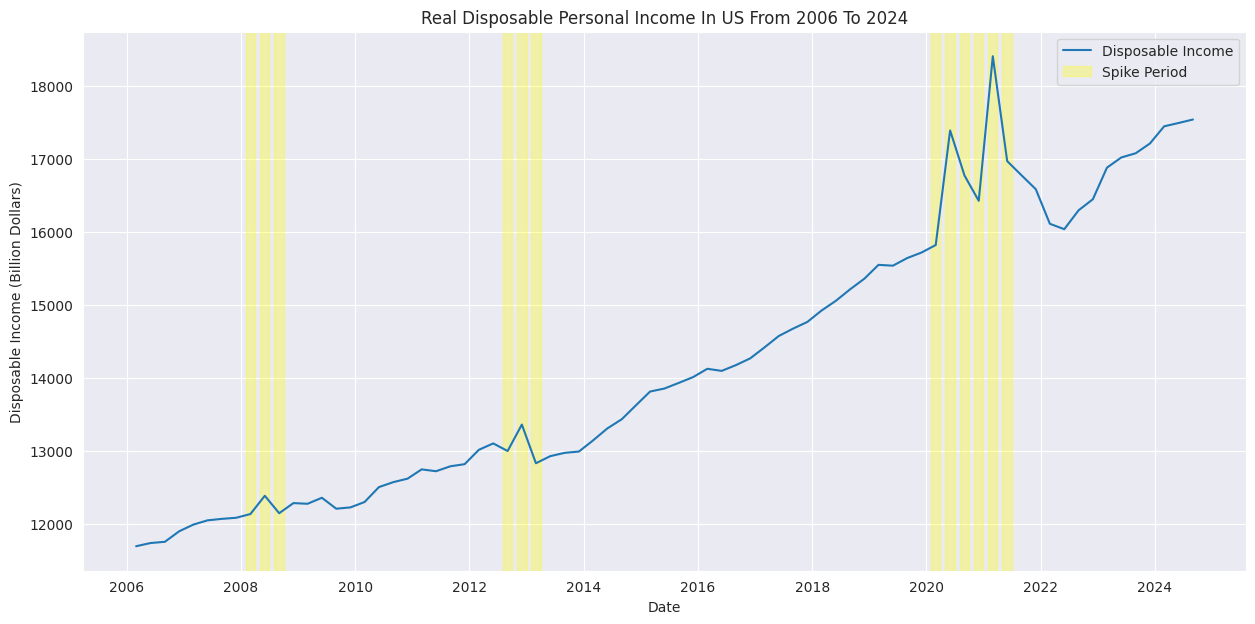

In [ ]:
# Define the spike dates and values (replace with actual values)
spike_dates = ['2008-03-01', '2008-06-01', '2008-09-01', '2012-09-01',
               '2012-12-01', '2013-03-01', '2020-03-01', '2020-06-01',
               '2020-09-01', '2020-12-01', '2021-03-01', '2021-06-01']

# Set figure size
plt.figure(figsize=(15, 7))

# Plot a line graph for the disposable income
plt.plot(df_disposable_income['date'], df_disposable_income['disposable_income'],
         label='Disposable Income')

for date in spike_dates:

    # Highlight the period
    plt.axvspan(
        pd.Timestamp(date) - pd.Timedelta(days=30),
        pd.Timestamp(date) + pd.Timedelta(days=30),
        color='yellow',
        alpha=0.3,
        label='Spike Period' if 'Spike Period' not in plt.gca().get_legend_handles_labels()[1] else None
    )

# Add the relevant labels, titles, and legend
plt.xlabel('Date')
plt.ylabel('Disposable Income (Billion Dollars)')
plt.title('Real Disposable Personal Income In US From 2006 To 2024')
plt.legend()

# Display the plot
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Visualization 4: Comparing The Industrial Production Amounts By Categories Over Time

The next visualization is to compare the industrial production amounts by categories from 2006 to 2024. We are given several categories such as Durable Materials, Non-Durable Materials, Durable Consumer Goods, Non-Durable Consumer Goods, Automotive Products, Business Equipment and Consumer Energy Products.
These are represented by the seven columns of `IPDMAT`, `IPNMAT`, `IPDCONGD`, `IPNCONGD`, `IPB51110SQ`, `IPBUSEQ` and `IPB51220SQ` respectively in the original dataset.

Before visualizing the data, we need to perform some data cleaning first as the columns that we are interested in are only available in the original dataset `quarterly_data` but not in the modified dataset `df_model`.

In [ ]:
# Performing Pre-Data Cleaning On The Relevant Columns

# Extracting the subset of the original dataset
df_subset_one = quarterly_data[['sasdate', 'IPDMAT', 'IPNMAT', 'IPDCONGD',
                                'IPNCONGD', 'IPB51110SQ', 'IPBUSEQ',
                                'IPB51220SQ']]

# Renaming the columns to more user-friendly formats
df_subset_one = df_subset_one.rename(columns = {'sasdate': 'date',
                                                'IPDMAT': 'durable_materials',
                                                'IPNMAT': 'non_durable_materials',
                                                'IPDCONGD': 'durable_consumer_goods',
                                                'IPNCONGD': 'non_durable_consumer_goods',
                                                'IPB51110SQ': 'automotive_products',
                                                'IPBUSEQ': 'business_equipment',
                                                'IPB51220SQ': 'consumer_energy_products'})

# Subset the rows to start with 2006
df_subset_one = df_subset_one.iloc[188:, :]

# Convert the 'date' column to datetime
df_subset_one['date'] = pd.to_datetime(df_subset_one['date'])

df_subset_one.head()

,date,durable_materials,non_durable_materials,durable_consumer_goods,non_durable_consumer_goods,automotive_products,business_equipment,consumer_energy_products
188,2006-03-01,92.1142,109.5435,105.6130,110.7434,87.8232,90.6517,88.4539
189,2006-06-01,92.2606,108.7407,105.1751,111.6971,87.4157,93.0464,91.1991
190,2006-09-01,92.2793,109.6586,102.9629,112.2416,83.3751,94.9458,93.6830
191,2006-12-01,91.9777,110.7491,102.5738,112.6281,84.2403,96.3246,92.6631
192,2007-03-01,93.7502,113.0004,102.6753,113.0359,86.0631,96.8983,95.2971


After the data is cleaned, we can visualize the industrial production amounts by each category using a line chart. There will be 7 lines hence might be a little cluttered. To circumvent the issue, we can set the linewidth to be of a smaller value.

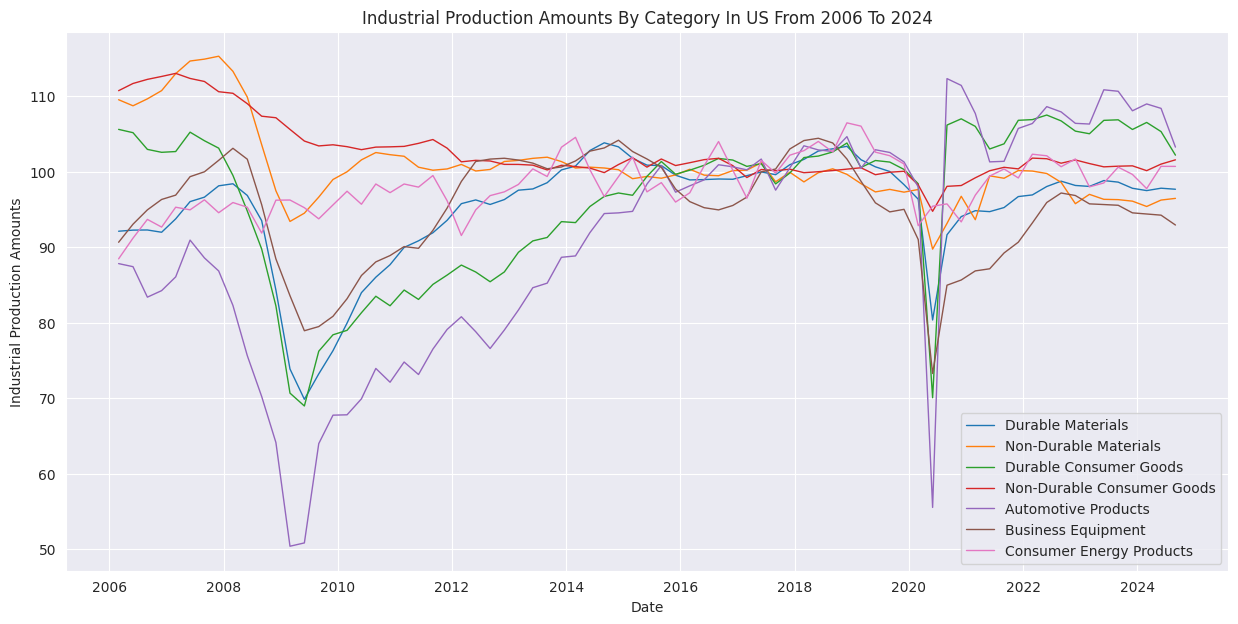

In [ ]:
# Plot a line graph
plt.figure(figsize=(15, 7))

# Plot the line graphs with reduced line thickness (linewidth=1)
plt.plot(df_subset_one['date'], df_subset_one['durable_materials'], label='Durable Materials', linewidth=1)
plt.plot(df_subset_one['date'], df_subset_one['non_durable_materials'], label='Non-Durable Materials', linewidth=1)
plt.plot(df_subset_one['date'], df_subset_one['durable_consumer_goods'], label='Durable Consumer Goods', linewidth=1)
plt.plot(df_subset_one['date'], df_subset_one['non_durable_consumer_goods'], label='Non-Durable Consumer Goods', linewidth=1)
plt.plot(df_subset_one['date'], df_subset_one['automotive_products'], label='Automotive Products', linewidth=1)
plt.plot(df_subset_one['date'], df_subset_one['business_equipment'], label='Business Equipment', linewidth=1)
plt.plot(df_subset_one['date'], df_subset_one['consumer_energy_products'], label='Consumer Energy Products', linewidth=1)

# Add the relevant labels, titles, and legend
plt.xlabel('Date')
plt.ylabel('Industrial Production Amounts')
plt.title('Industrial Production Amounts By Category In US From 2006 To 2024')
plt.legend()

# Display the plot
plt.show()

Observations From The Graph Plotted:

Most industrial production categories exhibit an overall increase in production from 2006 to 2024. However, there are periods of decline, particularly during economic downturns and global crises.

**Reasons For The Sharp Dips:**

A notable sharp decline occurs between 2008 and 2009, which coincides with the Great Recession (2007-2009). During this period, industries such as automotive products, durable materials, and business equipment experienced major setbacks due to reduced consumer demand, financial instability, and credit constraints.

Another steep drop around 2020 is evident across all categories, which aligns with the COVID-19 pandemic. Factory shutdowns, supply chain disruptions, and reduced economic activity led to an unprecedented dip in industrial production.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**Other Observations:**

Certain industries, such as Automotive Products and Durable Consumer Goods are more susceptible to major events suchas The Great Recession and COVID-19 compared to other industries such as Non-Durable Consumer Goods and Consumer Energy Products. This is shown by the more significant dips in these sectors (the drops in industrial production amounts for the purple line and the green lines during the sudden dips is much more signififcant compared to the red line and the pink line).

**Possible Reasons For The Difference In Dip Extent:**

1) **Elasticity Of Demand**

Automotive Products and Durable Consumer Goods are highly elastic—meaning their demand fluctuates significantly based on consumer confidence and economic conditions. During recessions or crises, consumers delay or cancel big-ticket purchases like cars, appliances, and electronics to prioritize essentials, leading to sharp drops in production.In contrast, Non-Durable Consumer Goods are necessities, so their demand remains relatively stable even in economic downturns.

2) **Complexity Of Supply Chains**

Automotive and durable goods industries have complex, global supply chains, making them more vulnerable to disruptions.For example, during COVID-19, factory shutdowns, semiconductor shortage and shipping delays severely impacted automobile production, causing a dramatic dip in industrial output.
Consumer Energy Products, on the other hand, are part of a more essential and stable sector—energy demand remains constant or even increases during crises as people continue to rely on heating, electricity, and fuel.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Visualization 5: Comparing The Number Of Employees In US By Industries Over Time

Afterwards, we also determine the number of employees in USA grouped by industry types over time from 2006 to 2024. From the graph plotted, we can examine if there are any changes to people's preferences on the industries that they want to work in.

There are many types of industries given in the dataset: Manufacturing (`	MANEMP`), Construction (`USCONS`), Education & Health Services (`USEHS`), Financial Activities (`USFIRE`), nformation Services(`USINFO`), Professional & Business Services (`USPBS`), Leisure & Hospitality(`USLAH`), Mining and logging(`USMINE`), Trade, Transportation & Utilities(`USTPU`), Government(`USGOVT`), Retail Trade(`USTRADE`), Wholesale Trade(`USWTRADE`), Government: Federal (`	CES9091000001`), Government: State Government(`CES9092000001`), Government: Local Government (`CES9093000001`), Other Services(`USSERV`) etc.

Due to too many types of industries, plotting a line graph for all these industries will **NOT** be feasible as the whole graph will be cluttered with lines. As such, we can group the industries further.

We will combine and condense into several major groups:

1) Industries -> Private + Service-Providing + Goods-Providing

2) Manufacturing

3) Goods -> Durable + Non-Durable

4) Construction -> Mining and logging, Construction

5) Services -> Education & Health, Information, Professional & Business, Other

6) Leisure & Hospitality

7) Financial Activities

8) Trade -> Trade, Transportation & Utilities, Retail Trade, Wholesale Trade

9) Government

We now only have 9 groups instead of the initial over 20 groups that makes the graph less cluttered. Instead of a line graph , we will consider using a stacked area chart for this visualization.  

Before visualizing the data, we need to perform some data cleaning first as the columns that we are interested in are only available in the original dataset `quarterly_data` but not in the modified dataset `df_model`.

In [ ]:
# Performing Pre-Data Cleaning On The Relevant Columns

# Extracting the subset of the original dataset
df_subset_two = quarterly_data.iloc[:, np.r_[0, 36:54]]

# Renaming the columns to more user-friendly formats
df_subset_two = df_subset_two.rename(columns = {'sasdate' : 'date',
                                                'USPRIV' : 'private_industry',
                                                'MANEMP' : 'manufacturing',
                                                'SRVPRD' : 'industry_service',
                                                'USGOOD' : 'industry_good',
                                                'DMANEMP' : 'durable_goods',
                                                'NDMANEMP' : 'non_durable_goods',
                                                'USCONS' : 'main_construction',
                                                'USEHS' : 'education_health',
                                                'USFIRE' : 'financial',
                                                'USINFO' : 'information_service',
                                                'USPBS' : 'professional_business_service',
                                                'USLAH' : 'leisure_hospitality',
                                                'USSERV' : 'other_service',
                                                'USMINE' : 'mining_logging',
                                                'USTPU' : 'trade_transportation_utilities',
                                                'USGOVT' : 'government',
                                                'USTRADE' : 'retail_trade',
                                                'USWTRADE' : 'wholesale_trade'})

# Categorizing the columns to less main categories
df_subset_two['industries'] = df_subset_two['private_industry'] + df_subset_two['industry_service'] + df_subset_two['industry_good']
df_subset_two['goods'] = df_subset_two['durable_goods'] + df_subset_two['non_durable_goods']
df_subset_two['services'] = df_subset_two['education_health'] + df_subset_two['information_service'] + df_subset_two['professional_business_service'] + df_subset_two['other_service']
df_subset_two['trade'] = df_subset_two['trade_transportation_utilities'] + df_subset_two['retail_trade'] + df_subset_two['wholesale_trade']
df_subset_two['construction'] = df_subset_two['main_construction'] + df_subset_two['mining_logging']

# Removing the unnecessary columns after the categorization
df_subset_two = df_subset_two.drop(columns = ['private_industry', 'industry_service', 'industry_good', 'durable_goods', 'non_durable_goods', 'main_construction',
                                              'education_health', 'information_service', 'professional_business_service', 'other_service', 'trade_transportation_utilities',
                                              'retail_trade', 'wholesale_trade', 'mining_logging'])

# Subset the rows to start with 2006
df_subset_two = df_subset_two.iloc[188:, :]

# Convert the 'date' column to datetime
df_subset_two['date'] = pd.to_datetime(df_subset_two['date'])

df_subset_two.head()

,date,manufacturing,financial,leisure_hospitality,government,industries,goods,services,trade,construction
188,2006-03-01,14211.0000,8329.3333,12986.3333,21876.0000,249589.3333,14211.0000,43924.6667,47220.4000,8313.3333
189,2006-06-01,14214.0000,8370.6667,13062.3333,21922.3333,250600.9999,14214.0000,44173.3334,47257.3334,8394.3334
190,2006-09-01,14157.3333,8376.0000,13144.0000,22022.0000,251334.6666,14157.3334,44395.3333,47333.5000,8408.6667
191,2006-12-01,14043.6667,8389.0000,13243.3333,22079.6667,252032.3333,14043.6666,44632.6666,47530.5667,8379.0000
192,2007-03-01,13991.6667,8386.6667,13354.0000,22125.0000,253083.6666,13991.6666,44917.3333,47798.1333,8396.3334


Now after the data is cleaned and the relevant columns are selected, we can proceed to plot the graph using a stacked area chart.

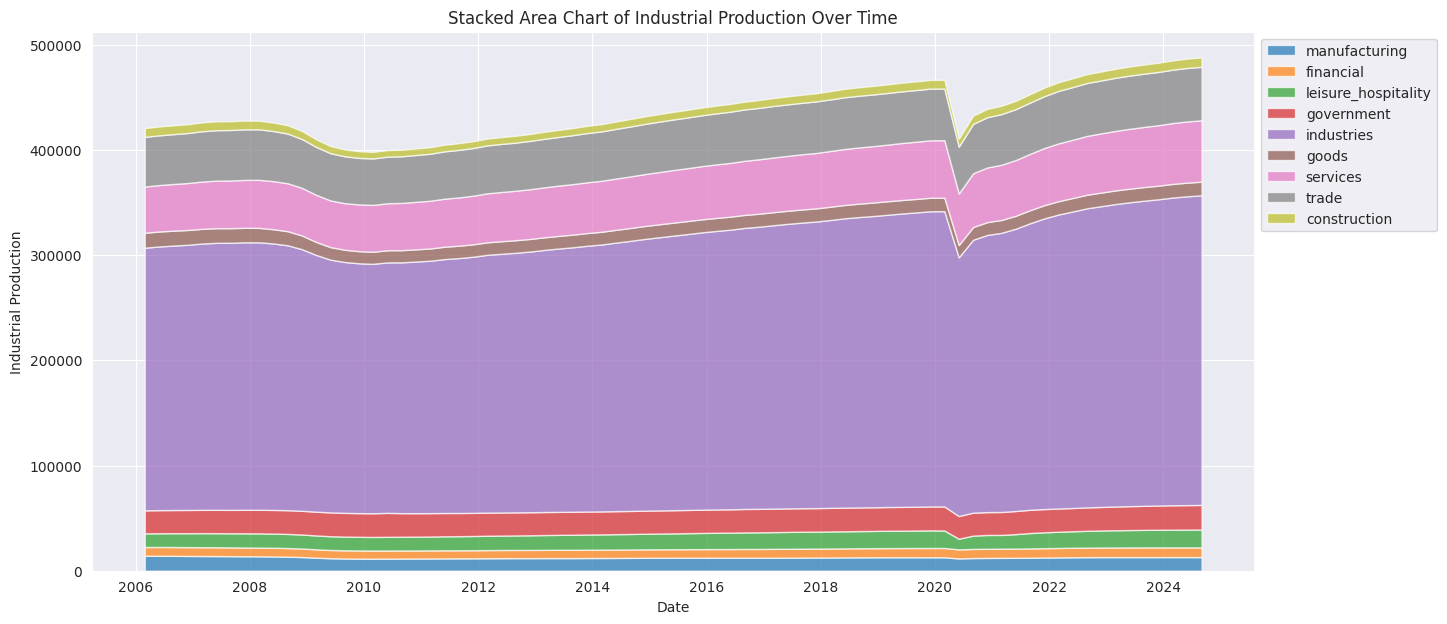

In [ ]:
# Set 'date' as index for time-series plotting
df_subset_two.set_index('date', inplace=True)

# Select only numeric columns for plotting
numeric_cols = df_subset_two.select_dtypes(include=['number'])

# --- Plot Stacked Area Chart ---
plt.figure(figsize=(15, 7))
plt.stackplot(numeric_cols.index, numeric_cols.T, labels=numeric_cols.columns, alpha=0.7)

# Labels and title
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Date")
plt.ylabel("Industrial Production")
plt.title("Stacked Area Chart of Industrial Production Over Time")

# Show the plot
plt.show()

**Overall Trend Of The Graph:**

1) Gradual Growth: The overall industrial production has been increasing steadily from 2006 to 2024, indicating economic expansion.

2) Largest Contributor: The industries sector (purple area) dominates the chart, contributing the most to total industrial production.

3) Services and Trade Growth: The services (pink area) and trade (gray area) sectors have shown consistent growth, reflecting the increasing importance of these industries in the economy.

4) Manufacturing, Construction, and Goods: These have remained relatively stable but have seen fluctuations due to economic cycles.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**Why the Industries Sector Has the Largest Number of Employees:**

The industries sector in this context includes manufacturing, private industries, and other production-related businesses. It covers a broad range of economic activities, including construction, transportation, utilities, and durable/non-durable goods production. These industries require a large workforce across different skill levels, from factory workers to engineers and managers. Additionally, the U.S. has a massive production capacity, meaning industries require a large labor force to handle production, logistics, quality control, and management.

**Why the Services And Trade Sectors Has High Number of Employees:**

The U.S. economy is primarily consumer-driven, with over 70% of GDP coming from consumer spending.This leads to high demand for services (healthcare, entertainment, finance) and retail trade (supermarkets, e-commerce, logistics). Trade (retail and wholesale) employs millions due to the presence of major retail giants like Walmart, Amazon and Target, which require massive staffing for operations, supply chain management, and customer service.
The rise of online shopping and e-commerce fulfillment centers has further increased employment in logistics and warehouse operations.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Visualization 6: Comparing The Civilian Unemployment Rate For Each Age Group As Well As Duration Over Time

To add on to visualization 5, since we have explored the total number of employees working in these sectors, they are actually employed people. Now let us look at the flip side of the coin, the civilians who are unemployed. Given information about the civilian unemployment rate for each age group of the US over time, we can actually try to identify and observe some trends in unemployment levels in the US as well.



###### Visualization 6.1: Civilian Unemployment Rate By Age Group

We are given two types of age groups - 16 to 19 years as well as 20 years and over. We will exclude the grouping by gender for the analysis and combine the two columns `LNS14000025` (men 20 years and over) and `LNS14000026` (women 20 years and over). The relevant columns that we need are `LNS14000012`, `LNS14000025`,`LNS14000026` and `sasdate`. We will extract rows that start in June (6th month) for every year from 2015 to 2024.

Before visualizing the data, we need to perform some data cleaning first as the columns that we are interested in are only available in the original dataset `quarterly_data` but not in the modified dataset `df_model`.

In [ ]:
# Performing Pre-Data Cleaning On The Relevant Columns

# Extracting the subset of the original dataset
df_subset_three = quarterly_data[['sasdate', 'LNS14000012', 'LNS14000025', 'LNS14000026']]

# Renaming the columns to more user-friendly formats
df_subset_three = df_subset_three.rename(columns = {'sasdate' : 'date',
                                                    'LNS14000012' : '16_to_19',
                                                    'LNS14000025' : '20_years_over_men',
                                                    'LNS14000026' : '20_years_over_women'})

# Categorizing the columns to less main categories
df_subset_three['20_years_over'] = df_subset_three['20_years_over_men'] + df_subset_three['20_years_over_women']

# Removing the unnecessary columns after the categorization
df_subset_three = df_subset_three.drop(columns = ['20_years_over_men', '20_years_over_women'])

# Subset the rows to start with 2015
df_subset_three = df_subset_three.iloc[224:, :]

# Convert the 'date' column to datetime
df_subset_three['date'] = pd.to_datetime(df_subset_three['date'])

# Extract the rows that are in the month of June
df_subset_three = df_subset_three[df_subset_three['date'].dt.month == 6]

df_subset_three

,date,16_to_19,20_years_over
225,2015-06-01,17.6667,9.9333
229,2016-06-01,16.0000,8.9666
233,2017-06-01,14.0667,7.9333
237,2018-06-01,12.8000,7.2000
241,2019-06-01,12.8667,6.6000
245,2020-06-01,28.5333,25.0666
249,2021-06-01,10.9333,11.4000
253,2022-06-01,10.6667,6.7666
257,2023-06-01,10.2667,6.5667
261,2024-06-01,12.0333,7.2666


After cleaning and obtaining the modified dataset, we can plot the unemployment rate of these two age categories using a combined bar chart for each year from 2015 to 2024.

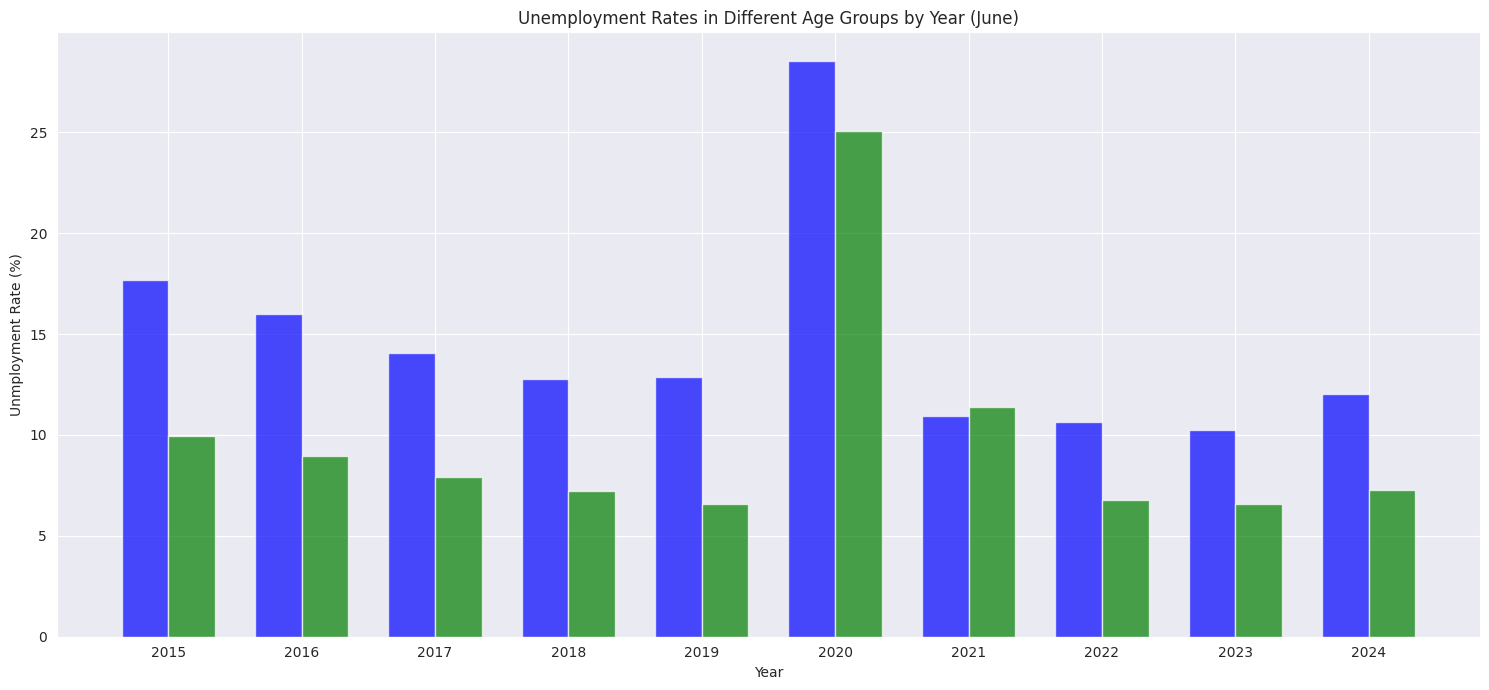

In [ ]:
# Extract unique years from the 'date' column
years = df_subset_three['date'].dt.year.unique()

# Set up the figure and axes for multiple subplots
fig, ax = plt.subplots(figsize=(15, 7))

# Width for the bars (to adjust the space between grouped bars)
bar_width = 0.35

# X-axis positions for each year (with offset for grouped bars)
index = np.arange(len(years))

# Loop through each year and plot the bars for both categories
for i, year in enumerate(years):
    # Subset data for the current year
    year_data = df_subset_three[df_subset_three['date'].dt.year == year]

    # Plot bars for '16_to_19' and '20_years_over'
    ax.bar(index[i] - bar_width/2, year_data['16_to_19'].mean(), bar_width, label=f'16 to 19 ({year})', color='b', alpha=0.7)
    ax.bar(index[i] + bar_width/2, year_data['20_years_over'].mean(), bar_width, label=f'20 years and over ({year})', color='g', alpha=0.7)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Unmployment Rate (%)')
ax.set_title('Unemployment Rates in Different Age Groups by Year (June)')
ax.set_xticks(index)
ax.set_xticklabels(years)

plt.tight_layout()
plt.show()

**General Trend Of Graph:**

1) There is a general decline in unemployment rates for both age groups over these years.

2) The blue bars (presumably representing younger individuals) consistently have higher unemployment rates than the green bars (likely older individuals) except in 2021. The green bars show a relatively stable and moderate downward trend.

**2020 Anomaly (Possibly COVID-19 Impact):**

There is a sharp spike in unemployment for both groups in 2020. The blue bar reaches its highest value (around 27%), while the green bar also increases significantly (around 25%). This is likely due to the economic downturn caused by the COVID-19 pandemic, which led to job losses.

**2024 Small Increase:**

The unemployment rate in 2024 for the blue group shows a slight increase compared to 2023, breaking the previous declining trend. his might indicate new economic challenges or shifts in employment patterns.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**Why Does COVID-19 Lead To High Unemployment Rates?**

The COVID-19 pandemic led to high unemployment rates worldwide due to a combination of economic disruptions, lockdown measures, and shifts in labor demand.

1) **Lockdowns & Restrictions:** To control the spread of the virus, governments imposed lockdowns, social distancing mandates, and travel restrictions. This led to businesses shutting down or reducing operations, especially in industries like hospitality, tourism, and retail.

2) **Decline in Consumer Demand:** With people staying at home and spending less, businesses saw lower sales and revenue losses, leading to layoffs.

3) **Supply Chain Disruptions:** Many companies could not obtain materials or deliver goods due to border closures and transport restrictions, affecting production and employment.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Visualization 6.2: Civilian Unemployment Rate By Duration

Besides age groups, we can also visualize the unemployment rates by duration of unemployment. We are given several columns - `UEMPLT5` (Number of Civilians Unemployed - Less Than 5 Weeks), `UEMP5TO14` (Number of Civilians Unemployed for 5 to 14 Weeks), `UEMP15T26` (Number of Civilians Unemployed for 15 to 26 Weeks) and `UEMP27OV` (Number of Civilians Unemployed for 27 Weeks and Over) that we will use for the visualization. We will extract rows that start in June (6th month) for every year from 2015 to 2024.

Before visualizing the data, we need to perform some data cleaning first as the columns that we are interested in are only available in the original dataset `quarterly_data` but not in the modified dataset `df_model`.

In [ ]:
# Performing Pre-Data Cleaning On The Relevant Columns

# Extracting the subset of the original dataset
df_subset_four= quarterly_data[['sasdate', 'UEMPLT5', 'UEMP5TO14', 'UEMP15T26', 'UEMP27OV']]

# Renaming the columns to more user-friendly formats
df_subset_four = df_subset_four.rename(columns = {'sasdate' : 'date',
                                                  'UEMPLT5' : 'less_than_five',
                                                  'UEMP5TO14' : 'five_to_fourteen',
                                                  'UEMP15T26' : 'fifteen_to_twentysix',
                                                  'UEMP27OV' : 'twentyseven_over'})

# Subset the rows to start with 2015
df_subset_four = df_subset_four.iloc[224:, :]

# Convert the 'date' column to datetime
df_subset_four['date'] = pd.to_datetime(df_subset_four['date'])

# Extract the rows that are in the month of June
df_subset_four = df_subset_four[df_subset_four['date'].dt.month == 6]

df_subset_four

,date,less_than_five,five_to_fourteen,fifteen_to_twentysix,twentyseven_over
225,2015-06-01,2498.6667,2417.0000,1248.3333,2408.3333
229,2016-06-01,2418.0000,2197.0000,1140.6667,2019.3333
233,2017-06-01,2253.6667,1988.0000,990.0000,1694.6667
237,2018-06-01,2136.0000,1933.6667,901.3333,1337.3333
241,2019-06-01,1989.6667,1743.3333,800.6667,1287.3333
245,2020-06-01,7008.3333,11131.3333,1237.6667,1148.0000
249,2021-06-01,2130.6667,2120.3333,1294.3333,3914.3333
253,2022-06-01,2182.3333,1633.6667,719.6667,1327.6667
257,2023-06-01,2004.0000,1877.6667,854.6667,1112.6667
261,2024-06-01,2233.0000,2002.3333,970.3333,1372.0000


After cleaning and obtaining the modified dataset, we can plot the unemployment rate of these four duration categories using a combined bar chart for each year from 2015 to 2024.

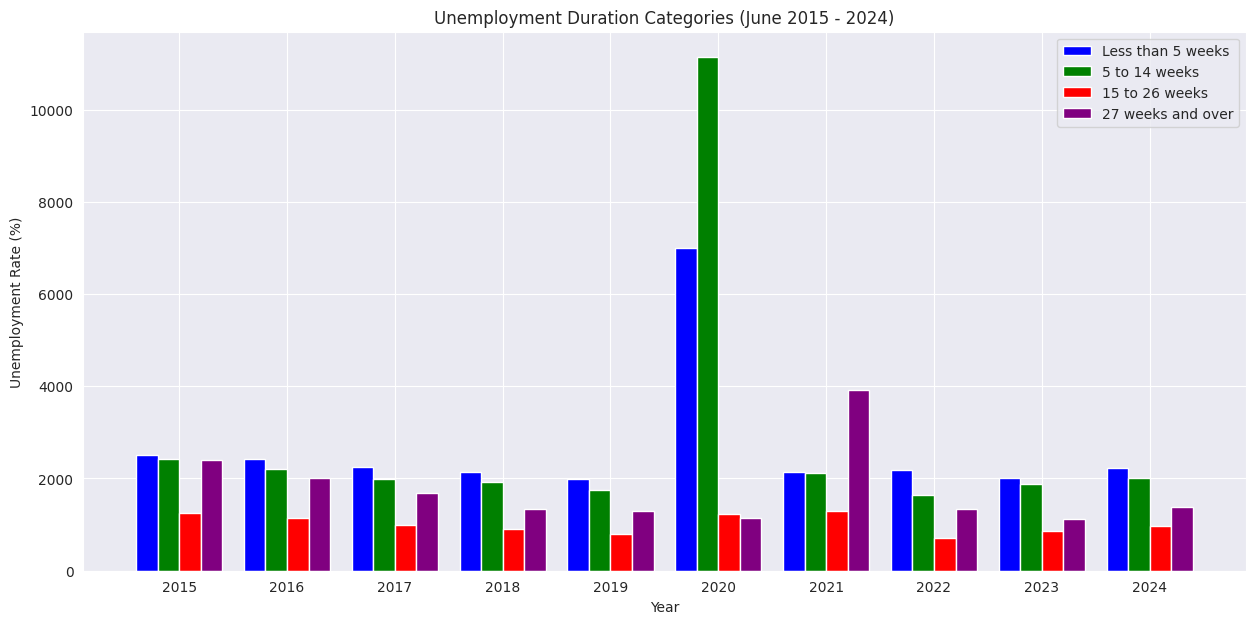

In [ ]:
# Set 'date' column as index
df_subset_four.set_index('date', inplace=True)

# Plot the bar chart
plt.figure(figsize=(15, 7))
bar_width = 0.2
years = df_subset_four.index.year

# Get bar positions
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot each category
plt.bar(r1, df_subset_four['less_than_five'], color='blue', width=bar_width, label='Less than 5 weeks')
plt.bar(r2, df_subset_four['five_to_fourteen'], color='green', width=bar_width, label='5 to 14 weeks')
plt.bar(r3, df_subset_four['fifteen_to_twentysix'], color='red', width=bar_width, label='15 to 26 weeks')
plt.bar(r4, df_subset_four['twentyseven_over'], color='purple', width=bar_width, label='27 weeks and over')

# Formatting
plt.xticks([r + bar_width*1.5 for r in range(len(years))], years)  # Center x-labels
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Duration Categories (June 2015 - 2024)')
plt.legend()
plt.show()

General Trend Of Graph:

The unemployment rate across all duration categories appears relatively stable from 2015 to 2019. A significant spike in unemployment happened in 2020, particularly for short-term unemployment (less than 5 weeks and 5 to 14 weeks).
After 2020, the unemployment rates decrease, returning to more typical levels by 2021 and beyond, although there are fluctuations. In 2021, long-term unemployment (27 weeks and over) is still higher than expected.

**2020 Surge in Unemployment:**

Similat to the observation in Visualization 6.1, the massive increase in short-term unemployment (especially for the less than 5 weeks and 5 to 14 weeks categories) is likely due to the COVID-19 pandemic. Lockdowns and business closures led to sudden job losses, pushing short-term unemployment figures to extreme levels. The increase in long-term unemployment (27 weeks and over) in 2021 reflects the difficulty many workers faced in finding new jobs post-pandemic. By 2022-2024, unemployment rates return to pre-pandemic levels, with a more balanced distribution across all duration categories.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Visualization 7: Personal Consumption Expenditures By Group Over Time

The next visualization that we can explore more about is the personal consumption expenditure of US citizens by category over time. Personal Consumption Expenditure (PCE) is a key economic indicator that measures consumer spending on goods and services. It reflects economic health, inflation trends, and household financial stability.

There are quite a number of categories that are included in the dataset but similar to Visualization 5, we will focus on the main groups of the categories to simplify the visualization to make it less cluttered and complex to analyse.
We will observe the trends of personal consumption expenditure from 2006 to 2024.

**What We Will Include: Three Main Categories**

1) Durable goods (`DDURRG3Q086SBEA`)

2) Nondurable goods (`DNDGRG3Q086SBEA`)

3) Services (`DSERRG3Q086SBEA`)

Before visualizing the data, we need to perform some data cleaning first as the columns that we are interested in are only available in the original dataset `quarterly_data` but not in the modified dataset `df_model`.

In [ ]:
# Performing Pre-Data Cleaning On The Relevant Columns

# Extracting the subset of the original dataset
df_subset_five= quarterly_data[['sasdate', 'DDURRG3Q086SBEA', 'DNDGRG3Q086SBEA', 'DSERRG3Q086SBEA']]

# Renaming the columns to more user-friendly formats
df_subset_five = df_subset_five.rename(columns = {'sasdate' : 'date',
                                                  'DDURRG3Q086SBEA' : 'goods_durable',
                                                  'DNDGRG3Q086SBEA' : 'goods_non_durable',
                                                  'DSERRG3Q086SBEA' : 'services'})

# Subset the rows to start with 2006
df_subset_five = df_subset_five.iloc[188:, :]

# Convert the 'date' column to datetime
df_subset_five['date'] = pd.to_datetime(df_subset_five['date'])

df_subset_five.head()

,date,goods_durable,goods_non_durable,services
188,2006-03-01,124.091,86.010,77.759
189,2006-06-01,123.514,87.266,78.488
190,2006-09-01,122.964,88.273,79.110
191,2006-12-01,122.179,86.235,79.643
192,2007-03-01,121.543,87.435,80.461


Similar to visualization 5, we can plot the graph of personal consumption expenditure by category from 2006 to 2024 using a stacked area chart. (Three colors for three categories)

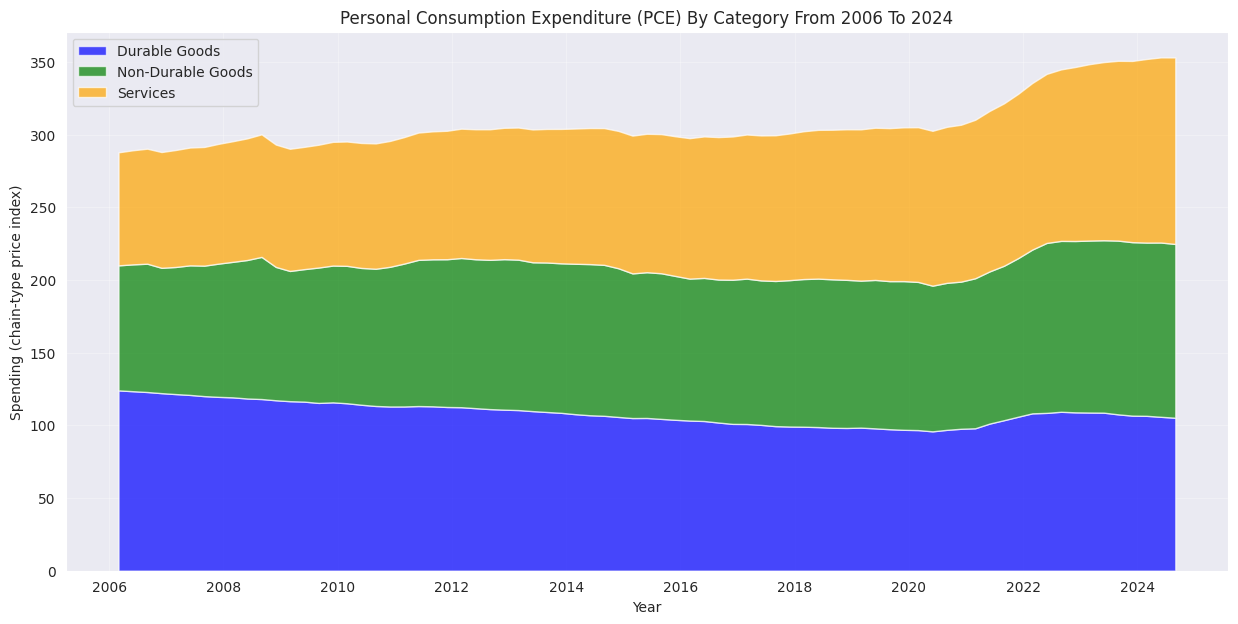

In [ ]:
# Plot a stacked area chart
plt.figure(figsize=(15, 7))
plt.stackplot(df_subset_five['date'],
              df_subset_five['goods_durable'],
              df_subset_five['goods_non_durable'],
              df_subset_five['services'],
              labels=['Durable Goods', 'Non-Durable Goods', 'Services'],
              colors=['blue', 'green', 'orange'], alpha=0.7)

# Formatting the chart
plt.xlabel('Year')
plt.ylabel('Spending (chain-type price index)')
plt.title('Personal Consumption Expenditure (PCE) By Category From 2006 To 2024')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)

# Show the plot
plt.show()

General Trend Of Graph:

The overall Personal Consumption Expenditure (PCE) has increased over time.
The three components (Durable Goods, Non-Durable Goods, and Services) show different growth patterns. The increase is especially significant in around 2022. For Durable Goods, the trend is generally negative over time, except for the sudden increase in 2022.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**Why A Significant Rise In PCE In 2022:**

In 2022, the USA experienced a sharp rise in Personal Consumption Expenditure (PCE) across all three categories (Durable Goods, Non-Durable Goods, and Services). This increase was driven by multiple economic and social factors:

1) **Post-COVID Economic Recovery**

After the 2020 pandemic lockdowns, consumer spending rebounded as businesses reopened, travel restrictions eased, and people returned to normal activities.
There was pent-up demand for goods and services that people postponed purchasing in 2020 and 2021.

2) **Inflation and Higher Prices**

Inflation rose sharply in 2022, with the Consumer Price Index (CPI) peaking at 9.1% in June 2022, the highest in over 40 years. Prices for goods and services increased, which automatically raised the total amount of PCE, even if actual consumption remained steady.

3) **Wage Growth and Job Market Strength**

The labor market remained strong, with low unemployment rates and rising wages.
Higher disposable income contributed to increased spending, particularly in services and non-durable goods.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**Why Durable Goods Showed a Slight Decrease Over Time:**

Possible Reasons:

1) **Saturation of Durable Goods Purchases**

During the pandemic, many consumers purchased big-ticket items (e.g., cars, home appliances, electronics, and furniture) due to stimulus money and home-improvement trends.By 2022, demand naturally declined, as people had already made these major purchases.

2) **Rising Interest Rates**

To combat inflation, the Federal Reserve aggressively raised interest rates. Higher borrowing costs made financing for durable goods (cars, homes, appliances) more expensive, leading to reduced consumer spending on these items.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Visualization 8: Consumer Price Index For Urban Consumers For Each Category Over Time

Another visualization relating to the consumption of goods ans services is the Consumer Price Index. The Consumer Price Index (CPI) is a key economic indicator that measures the average change in prices paid by consumers for goods and services over time. It is used to track inflation (the rate at which prices rise) and assess the cost of living in an economy.

We are given two columns: `CPIAUCSL` (Consumer Price Index for All Urban Consumers: All Items) and `CPILFESL` (Consumer Price Index for All Urban Consumers: All Items Less Food & Energy).

We should choose the former `CPIAUCSL` to be analyzed. The Consumer Price Index for All Urban Consumers: All Items (`CPIAUCSL`) is a better indicator of overall CPI in the U.S. compared to CPI Less Food & Energy (`CPILFESL`) because it captures the full cost of living experienced by consumers. CPIAUCSL includes all essential consumer goods and services, such as food, energy, housing, healthcare, and transportation. Since food and energy are significant expenses for households, excluding them (as `CPILFESL` does) does not fully represent actual inflation felt by consumers.

Before visualizing the data, we need to perform some data cleaning first as the columns that we are interested in are only available in the original dataset `quarterly_data` but not in the modified dataset `df_model`.

In [ ]:
# Performing Pre-Data Cleaning On The Relevant Columns

# Extracting the subset of the original dataset
df_subset_six= quarterly_data[['sasdate', 'CPIAUCSL']]

# Renaming the columns to more user-friendly formats
df_subset_six = df_subset_six.rename(columns = {'sasdate' : 'date',
                                                'CPIAUCSL' : 'cpi_total'})

# Subset the rows to start with 2006
df_subset_six = df_subset_six.iloc[188:, :]

# Convert the 'date' column to datetime
df_subset_six['date'] = pd.to_datetime(df_subset_six['date'])

df_subset_six.head()

,date,cpi_total
188,2006-03-01,199.4667
189,2006-06-01,201.2667
190,2006-09-01,203.1667
191,2006-12-01,202.3333
192,2007-03-01,204.3170


We can plot the trend of the total CPI from 2006 to 2024 using a simple line graph. From the line graph, trends can be obsrved.

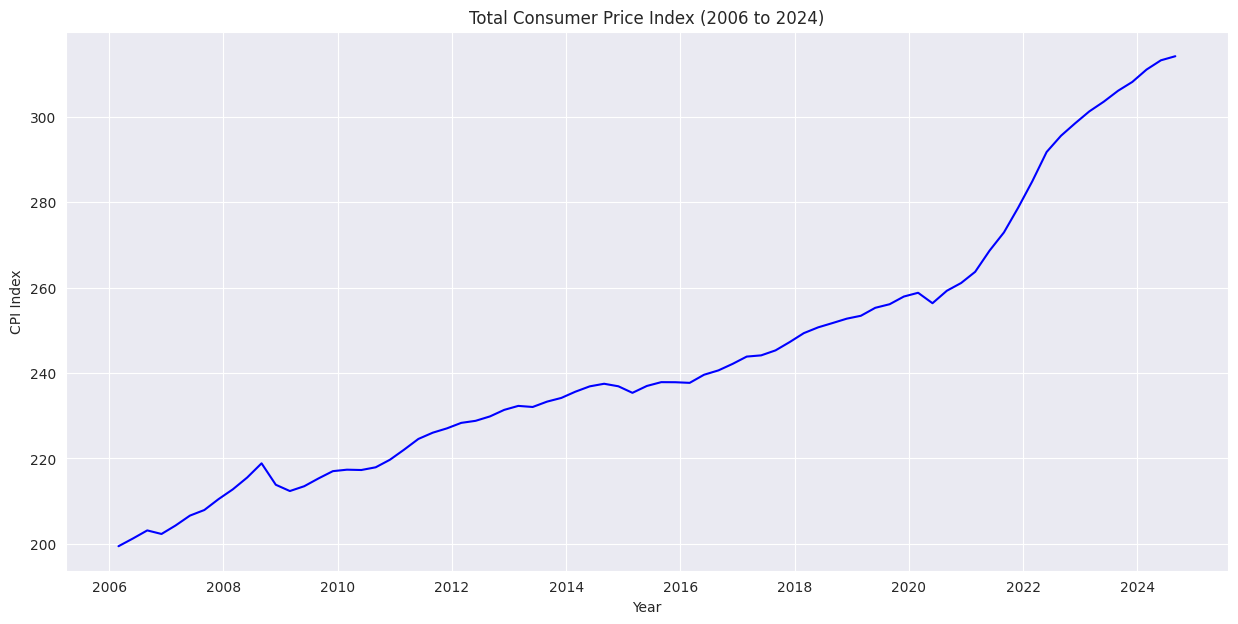

In [ ]:
# Setting a relevant figure size
plt.figure(figsize=(15, 7))

# Plot CPI Total lie graph
plt.plot(df_subset_six['date'], df_subset_six['cpi_total'], color = 'blue')

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('CPI Index')
plt.title('Total Consumer Price Index (2006 to 2024)')
plt.grid(True)

# Show the plot
plt.show()

Overall Trend Of Graph:

The CPI exhibits a consistent upward trend over the years, indicating a steady increase in prices, which is characteristic of inflation.The increase appears to be relatively gradual until around 2020, after which the slope steepens significantly.

Between 2008 and 2009, there is a noticeable dip, likely corresponding to the global financial crisis. A slight stagnation in CPI growth is visible around 2014 to 2016, possibly indicating lower inflation rates during that period.
A sharp rise from 2021 onward, indicating a period of high inflation, which aligns with global economic events such as pandemic-related disruptions and supply chain issues.

To make things clearer, we can show in the line plots the different periods where the CPI values either drop, rise slightly or rise significantly. These can be represented by different colours in the line plot.

**A Possible Segmentation:**

1) Red - Shows a sudden dip in the CPI value

2) Light Green - Shows a gradual increase in the CPI value over time

3) Dark Green - Shows a significant increase in the CPI value over time

4) Blue - For recent periods, CPI value is unknown in the near future (2023 onwards)

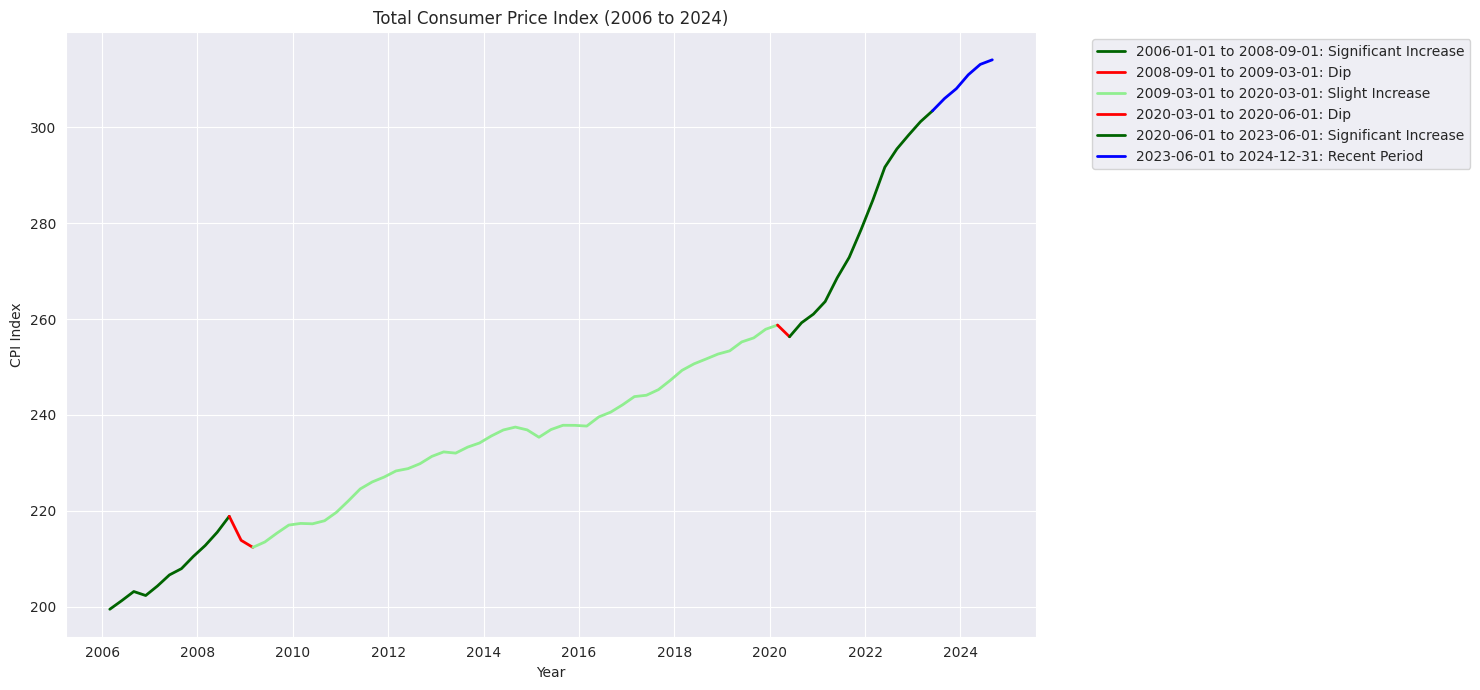

In [ ]:
# Setting a relevant figure size
plt.figure(figsize=(15, 7))

# Define time periods with specific dates
periods = [
    ('2006-01-01', '2008-09-01', 'darkgreen', 'Significant Increase'),
    ('2008-09-01', '2009-03-01', 'red', 'Dip'),
    ('2009-03-01', '2020-03-01', 'lightgreen', 'Slight Increase'),
    ('2020-03-01', '2020-06-01', 'red', 'Dip'),
    ('2020-06-01', '2023-06-01', 'darkgreen', 'Significant Increase'),
    ('2023-06-01', '2024-12-31', 'blue', 'Recent Period')
]

# Plot each period
for start_date, end_date, color, label in periods:
    mask = (df_subset_six['date'] >= start_date) & (df_subset_six['date'] <= end_date)
    plt.plot(df_subset_six.loc[mask, 'date'],
             df_subset_six.loc[mask, 'cpi_total'],
             color=color,
             label=f'{start_date} to {end_date}: {label}',
             linewidth=2)

# Formatting the graph
plt.xlabel('Year')
plt.ylabel('CPI Index')
plt.title('Total Consumer Price Index (2006 to 2024)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Visualization 9: Industrial Production In US By Type Over Time

Additionally, we can also gauge the Industrial Production Rates in the various sectors in the USA from 2006 to 2024.

Industrial production measures the total output of the manufacturing, mining, and utilities sectors. Since manufacturing and industrial activities respond quickly to economic changes, a decline in production often signals an upcoming recession. Businesses slow down production when demand weakens, reducing output before an official recession is declared.

During a recession, consumer demand falls, leading to reduced factory output, Lower capacity utilization, job losses in manufacturing and supply chain slowdowns. Businesses may cut production in response to weaker demand, higher costs, or uncertainty about the future. This leads to a reduced industrial production.

From the given dataset, we have three columns that are related to industrial production in the US, `IPMANSICS` (Industrial Production: Manufacturing (SIC)), `IPB51222S` (Industrial Production: Residential Utilities) and `IPFUELS` (Industrial Production: Fuels). We will extract rows that start in June (6th month) for every year from 2006 to 2024.

Before visualizing the data, we need to perform some data cleaning first as the columns that we are interested in are only available in the original dataset `quarterly_data` but not in the modified dataset `df_model`.

In [ ]:
# Performing Pre-Data Cleaning On The Relevant Columns

# Extracting the subset of the original dataset
df_subset_seven = quarterly_data[['sasdate', 'IPMANSICS', 'IPB51222S', 'IPFUELS']]

# Renaming the columns to more user-friendly formats
df_subset_seven = df_subset_seven.rename(columns = {'sasdate' : 'date',
                                                    'IPMANSICS' : 'manufacturing',
                                                    'IPB51222S' : 'residence_utilities',
                                                    'IPFUELS' : 'fuels'})

# Subset the rows to start with 2006
df_subset_seven = df_subset_seven.iloc[188:, :]

# Convert the 'date' column to datetime
df_subset_seven['date'] = pd.to_datetime(df_subset_seven['date'])

# Extract the rows that are in the month of June
df_subset_seven = df_subset_seven[df_subset_seven['date'].dt.month == 6]

df_subset_seven.head()

,date,manufacturing,residence_utilities,fuels
189,2006-06-01,104.3558,98.9424,82.6351
193,2007-06-01,107.7196,101.8629,86.8344
197,2008-06-01,105.2236,103.0839,86.4421
201,2009-06-01,86.3125,100.5531,89.1386
205,2010-06-01,93.4837,102.3503,88.0617


For this, we can actually use a heatmap for each category to gauge the increase or decrease in indutrial production levels from year to year using seaborn.

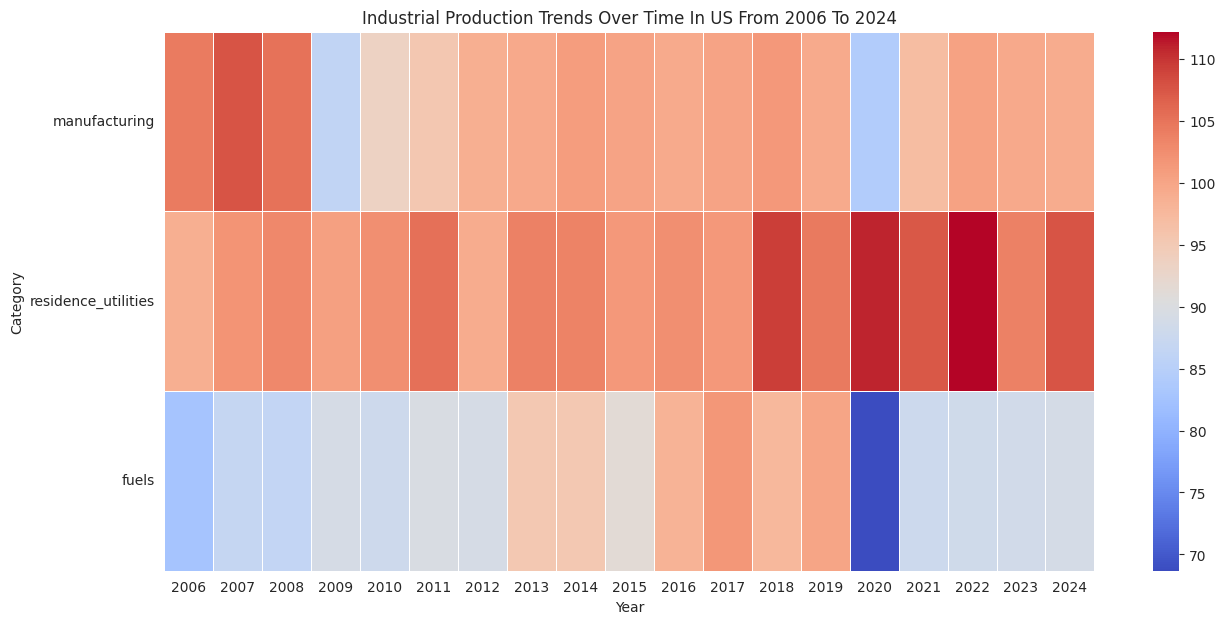

In [ ]:
# Set date as index
df_subset_seven.set_index('date', inplace=True)

# Extract year for x-axis labels
df_subset_seven.index = df_subset_seven.index.year

# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df_subset_seven.T, cmap='coolwarm', annot=False, linewidths=0.5, cbar=True)

# Formatting
plt.title('Industrial Production Trends Over Time In US From 2006 To 2024')
plt.xlabel('Year')
plt.ylabel('Category')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show plot
plt.show()

**Key Observations:**

**1) Manufacturing**

Manufacturing production was high from 2006 to 2008, as seen from the strong red shades. A drop occurred around 2009, possibly due to the 2008 financial crisis, leading to reduced demand and economic slowdown. A gradual recovery followed from 2010 onwards, stabilizing at moderate levels. Around 2019-2020, there was another drop, likely due to the COVID-19 pandemic, which disrupted supply chains and led to temporary shutdowns. Recovery is observed post-2021, as industries resumed operations.

**2) Residence Utilities**

This category had stable production from 2006 to 2019, with a relatively warm color tone. A significant spike occurred in 2020 and 2021, as indicated by the deep red shades. The increase aligns with the COVID-19 lockdown period, where more people stayed at home, increasing utility consumption (Increased electricity, water, and gas usage during work-from-home and lockdowns). Post-pandemic, production levels return to normal.

**3) Fuels**

From 2006 to 2014, fuel production was low but steadily increasing (transitioning from blue to neutral tones). A peak occurred around 2014-2017, likely due to the US shale oil boom, increasing domestic fuel production.
A sudden drop in 2020 (dark blue shade) aligns with pandemic-related travel restrictions that caused reduced fuel demand. Matches the collapse in fuel demand during COVID-19, where fewer cars, flights, and industrial operations led to reduced fuel usage. A slow recovery is observed post-2021, but production remains lower than pre-pandemic levels.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Visualization 10: Exchange Rates Between US And Other Countries Over Time

Lastly, we can explore the exchange rates between US and other countries over time to determine whether the US currency is weakening or strengthening with respect to other countries. The exchange rate is the price of one country's currency in terms of another currency. For example, the exchange rate between the U.S. dollar (USD) and the Euro (EUR) might be 1 USD = 0.90 EUR, meaning that 1 U.S. dollar can be exchanged for 0.90 Euros.

**Why Exchange Rates Matter for the US Economy:**

1) **Impact on Trade and Competitiveness**

A strong US dollar makes imports cheaper but US exports more expensive for foreign buyers. This can lead to a trade deficit (imports > exports).
A weaker dollar makes exports more competitive, benefiting American businesses selling goods abroad.

2) **Inflation and Interest Rates**

A weaker USD can increase inflation because imported goods become more expensive. A strong USD can reduce inflation but might slow economic growth.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

There are several columns available for use regarding the exchange rates between USA and other conntries. These include:

1) `EXUSEU` (U.S. / Euro Foreign Exchange Rate)

2) `EXSZUSx` (Switzerland / U.S. Foreign Exchange Rate)

3) `EXJPUSx` (Japan / U.S. Foreign Exchange Rate)

4) `EXUSUKx` (U.S. / U.K. Foreign Exchange Rate)

5) `EXCAUSx` (Canada / U.S. Foreign Exchange Rate)

Before visualizing the data, we need to perform some data cleaning first as the columns that we are interested in are only available in the original dataset `quarterly_data` but not in the modified dataset `df_model`.

In [ ]:
# Performing Pre-Data Cleaning On The Relevant Columns

# Extracting the subset of the original dataset
df_subset_eight = quarterly_data[['sasdate', 'EXUSEU', 'EXSZUSx', 'EXJPUSx', 'EXUSUKx', 'EXCAUSx']]

# Renaming the columns to more user-friendly formats
df_subset_eight = df_subset_eight.rename(columns = {'sasdate' : 'date',
                                                    'EXUSEU' : 'eu_xchange',
                                                    'EXSZUSx' : 'swiss_xchange',
                                                    'EXJPUSx' : 'japan_xchange',
                                                    'EXUSUKx' : 'uk_xchange',
                                                    'EXCAUSx' : 'canada_xchange'})

# Subset the rows to start with 2006
df_subset_eight = df_subset_eight.iloc[188:, :]

# Apply log transformation to 'japan_xchange'
df_subset_eight['japan_xchange'] = np.log(df_subset_eight['japan_xchange'])

# Convert the 'date' column to datetime
df_subset_eight['date'] = pd.to_datetime(df_subset_eight['date'])

df_subset_eight.head()

,date,eu_xchange,swiss_xchange,japan_xchange,uk_xchange,canada_xchange
188,2006-03-01,1.2031,1.2958,4.761076,1.7536,1.1545
189,2006-06-01,1.2567,1.2447,4.740356,1.8267,1.1226
190,2006-09-01,1.2738,1.2383,4.756189,1.8741,1.1212
191,2006-12-01,1.2903,1.2352,4.768568,1.9173,1.1392
192,2007-03-01,1.3106,1.2334,4.782512,1.9550,1.1718


We realised that the Japanese exchange rate values are way too high (in the thousands) compared to the other countries such as the UK and Canada. Hence, this will make the visualization ineffective as all the other countries will be clustered below. As such, to reduce the discrepency, we will apply a **log transformation** to the japan exchange rates.

After a log transformation, the values of exchange rates hover to around 4 to 5. Although it is still significantly higher than the other countries (average of 1 to 2), the new modified japan exchange rate values are at least much closer compared to the intial values of around 1000.

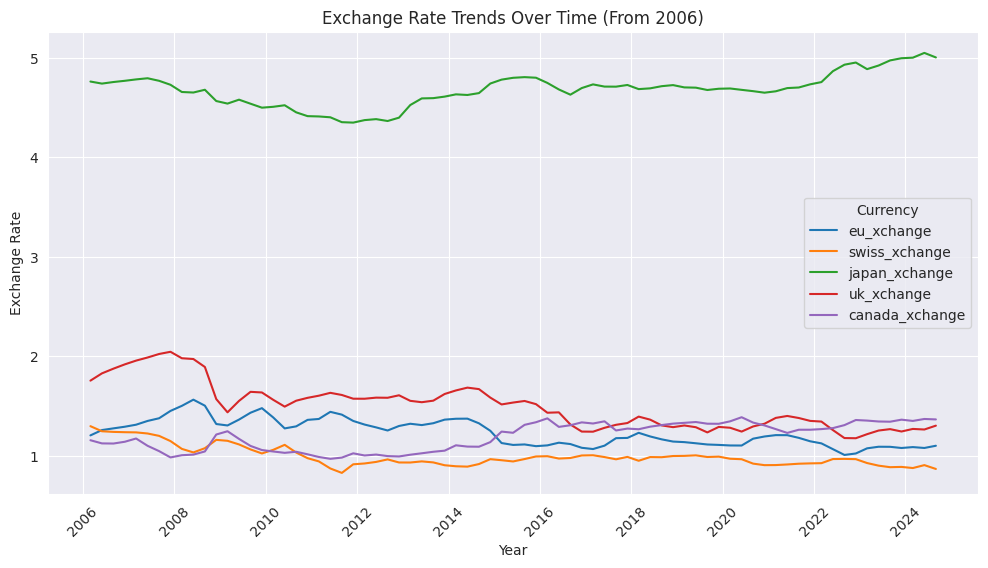

In [ ]:
# Set Seaborn style
sns.set_style("darkgrid")

# Plot the exchange rates
plt.figure(figsize=(12, 6))
for column in df_subset_eight.columns[1:]:  # Exclude 'date' column
    plt.plot(df_subset_eight['date'], df_subset_eight[column], label=column)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Trends Over Time (From 2006)')
plt.legend(title="Currency")
plt.xticks(rotation=45)
plt.show()

From the graph, we can analyze whether the US dollar (USD) is strengthening or weakening over time by looking at how the exchange rates of other currencies behave against the USD.

**Key Observations:**

For Euro (`eu_xchange`), British Pound (`uk_xchange`), and Swiss Frank(`swiss_xchange`), the exchange rates for these currencies decrease over time (except for minor fluctuations). A declining exchange rate means the USD is strengthening, as fewer USD are needed to buy these currencies.

Canadian Dollar (`canadian_xchange`) and Japanese Yen (`japan_xchange`) are quite constant over time (not really any increase or decrease in exchange rates between USA and Canada or USA and Japan from 2006 to 2024).

**Conclusion:**

Since most exchange rates decrease over time, this suggests that the USD is strengthening against major currencies. The USD's strength may be attributed to:

1) The Federal Reserve's monetary policies (interest rate hikes or economic stability)

2) The relative economic performance of the USA compared to other countries

3) Global events such as the 2008 financial crisis, Brexit, and oil price fluctuations.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 3: Machine Learning Model Implementation

For the implementation of the Machine Learning model, we will be making use of the **Autoregressive Distributed Lag (ARDL) model**. Before we delve into the **ARDL model**, we need to first understand the **Autoregressive (AR)** model.

An **Autoregressive (AR)** model is a **type of time series model where the current value of a variable depends on its past values**. It is a special case of the more general Autoregressive Moving Average (ARMA) and Autoregressive Integrated Moving Average (ARIMA) models. It is used to model time series data where past values influence future values. The series needs to be stationary (constant mean and variance over time). AR models are used mainly for forecasting and understanding how past values influence the present.

An **Autoregressive Distributed Lag (ARDL) model** extends the **AR model** by **including both lagged values of the dependent variable (autoregressive terms) and lagged values of one or more independent variables (distributed lag terms)**. It is particularly useful when analyzing relationships between variables in both the short run and long run.

ARDL models can handle both stationary and non-stationary data, making it more flexible than AR models, allowing for the estimation of both short-run and long-run relationships between variables. ARDL models are often used in econometrics for modeling relationships between economic variables (eg: how inflation influences interest rates over time).

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 3.1: Make Variables Stationary
Economic variables like GDP, consumption, and investment often exhibit trends, seasonality, or changing variances over time, making them non-stationary. Since stationarity is a key assumption for AR and ARDL models, non-stationary data must be transformed to ensure stable relationships over time.

A common approach is differencing, which removes trends and makes the data stationary. This improves model reliability and ensures meaningful forecasts by preventing spurious relationships.

In [ ]:
# Converting real_gdp to gdp_qq for real gdp growth
df_model['gdp_qq'] = df_model['real_gdp'].pct_change() * 100
df_model = df_model.drop('real_gdp', axis=1)
df_model = df_model.dropna()

In [ ]:
# Loop through each column in the dataframe
for col in df_model.columns:
    # Exclude the 'date' column from processing
    if col != 'date':
        # Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity
        # Extract the p-value
        p_value = adfuller(df_model[col])[1]
        # If the p-value is greater than 0.05, the series is non-stationary
        if p_value > 0.05:
            # Apply first-order differencing to make the series stationary
            df_model[col] = df_model[col].diff()
            # Drop NaN values created by differencing
            df_model[col].dropna(inplace=True)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 3.2: Selecting Top Variables with High Correlation with GDP
Correlation analysis helps identify variables that have strong linear relationships with GDP. Selecting highly correlated variables ensures that we include the most relevant predictors in our model, improving its explanatory power and reducing unnecessary complexity.

**Process of Selecting Top Variables with High Correlation with GDP:**

**1. Compute the correlation matrix**

The Pearson correlation coefficient is often used to measure the strength and direction of the linear relationship between two variables. The correlation coefficient (r) ranges from -1 to 1:

**Case 1:** r > 0 → Positive relationship (example: consumption increases when GDP increases).

**Case 2:** r < 0 → Negative relationship (example: unemployment decreases when GDP increases).

**Case 3:** r = 0 → No linear relationship.

**2. Select the top correlated variables**

Choose variables with a high absolute correlation (example: |r| > 0.85) to GDP.
This ensures we focus on variables that significantly influence GDP.

**3. Remove Multicollinearity (If Needed)**

Some variables may be highly correlated with each other (example: consumption and investment may both be highly correlated with GDP and with each other). High correlation between independent variables (multicollinearity) can distort regression estimates. Use Variance Inflation Factor (VIF) to detect multicollinearity and remove redundant variables.

**We will not take into account multicollinearity for simplification of the model as for multicollinearity, we need to define our own function to check for multicollinearity and given the relatively large number of columns that we are working on (more than 30 columns), it will be inefficient to check for multicollinearity between columns (32C2 number of permutations to check)**

In [ ]:
# Step 1: Calculate the correlation matrix for all variables in the dataset
correlation_matrix = df_model.corr()

# Step 2: Extract the correlation values of 'real_gdp' with all other variables
gdp_correlation = correlation_matrix['gdp_qq']

# Step 3: Set a threshold to identify strongly correlated variables
# Only select variables with an absolute correlation greater than 0.85
threshold = 0.85

# Step 4: Identify the top variables that meet the correlation threshold
top_variables = gdp_correlation[gdp_correlation.abs() > threshold].index.tolist()

# Step 5: Print the selected variables for verification
print("Top correlated variables with GDP:", top_variables)

# Step 6: Create a new DataFrame with only the selected top correlated variables
df = df_model[top_variables]

Top correlated variables with GDP: ['total_consumption', 'real_exports', 'real_imports', 'production_index', 'capacity_util', 'unemployed_rate', 'manu_trade_sales', 'gdp_qq']


From the model, there are 8 variables that are highly correlated with GDP, with a correlation constant of more than 0.85 - `real_gdp`, `total_consumption`, `real_exports`, `real_imports`, `production_index`, `capacity_util`, `unemployed_rate` and `manu_trade_sales`.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 3.3: Selecting the Optimal Lag for GDP in ARDL Model
The Autoregressive Distributed Lag (ARDL) model improves upon a standard Autoregressive (AR) model by incorporating both past values of GDP and lagged values of other economic indicators (e.g., consumption, production, exports). This allows us to capture the dynamic interactions between GDP and its explanatory variables over time.

Unlike traditional time series models like ARIMA, ARDL is particularly useful when analyzing both short-run and long-run relationships between variables, even if they have different levels of stationarity (I(0) or I(1), but not I(2)).

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**Why Use AIC for Model Selection?**

**AIC (Akaike Information Criterion)** helps in selecting the best model by balancing:

*   Goodness of fit (how well the model explains the data)
*   Complexity (avoiding unnecessary variables that lead to overfitting)

AIC is calculated as:

**AIC = 2k - 2ln(L)**

where:

k = number of estimated parameters (complexity penalty)

L = likelihood of the model (goodness of fit)

**A lower AIC value indicates a better model.** AIC is used to balance the model's fit and complexity. This helps us to strike a balance between capturing all relevant relationships in the data while avoiding overfitting.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**Process Of Using ARDL Model With AIC For Model Selection:**

**1. Define the ARDL Model and Select Lags**

We need to determine the optimal lag length for the dependent variable (real_gdp).

We use AIC to compare different lag structures and select the best model.

**2. Run ARDL Model Selection Using AIC**

We can use the `auto_ardl` function from `pmdarima` or the `statsmodels` ARDL method to automatically find the best lag structure based on the lowest AIC value.

In [ ]:
import statsmodels.api as sm

# Step 1: Define the list of independent variables to be tested in the ARDL model
independent_vars = ['total_consumption', 'real_exports', 'real_imports', 'production_index',
                    'capacity_util', 'unemployed_rate', 'manu_trade_sales']

# List to store AIC values for different models
aic_values_for_gdp_lags = []

df = df_model.copy()

In [ ]:
# Loop over possible lag lengths for real_gdp from 1 to 4
for lag_gdp in range(1, 5):
    # Create lagged variables for real_gdp (e.g., lag_real_gdp_1, lag_real_gdp_2, etc.)
    for lag in range(1, lag_gdp + 1):
        df[f'lag_gdp_qq_{lag}'] = df['gdp_qq'].shift(lag)

    # Drop rows with missing values due to lagging
    df_temp = df.dropna()

    # Define dependent and independent variables
    y = df_temp['gdp_qq']
    X = df_temp[[f'lag_gdp_qq_{i}' for i in range(1, lag_gdp + 1)]]
    X = sm.add_constant(X)

    # Fit the OLS model for real_gdp lags
    model = sm.OLS(y, X).fit()

    # Store the AIC value
    aic_values_for_gdp_lags.append((lag_gdp, model.aic))

# Select the best lag for real_gdp
best_lag_for_gdp = min(aic_values_for_gdp_lags, key=lambda x: x[1])[0]
print(f"\nBest lag for gdp_qq: {best_lag_for_gdp},AIC: {min(aic_values_for_gdp_lags, key=lambda x: x[1])[1]}")


Best lag for gdp_qq: 4,AIC: 258.3683869514142


From the results obtained, calculating the AIC values for 1 to 4 lags with `real_gdp`, the best model is **4 lags for `real_gdp`** with the **lowest AIC value of 258.37**.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 3.4: Selecting the Optimal Lag for GDP in the ARDL Model

Next, we need to determine the optimal number of lags for the independent variables in the ARDL model using the Akaike Information Criterion (AIC). It systematically evaluates different lag structures to identify the model that best balances complexity and goodness-of-fit.

**Process On Selecting The Optimal Lag:**

**1. Define Best Lags for Independent Variables**

A dictionary `aic_values_for_gdp_lags` is created to store the optimal lag length for real_gdp, based on results from previous steps.

**2. Iterate Over Different Lags for each Independent Variable**

The model tests 1 to 4 lags for each independent variable (example:  `total_consumption`, `real_exports` etc.), storing the corresponding AIC values in `best_lags_for_vars`.

**3. Create Lags for GDP and Independent Variables**

For each value of `lag_gdp`, the following steps are performed:

✅ Create lags for `real_gdp`

✅ Create lags for each independent variable based on its best lag

This ensures each independent variable has lags according to `best_lags_for_vars`.

**4. Drop Missing Values Due to Lagging**

Since shifting introduces NaN values, the rows with missing values are dropped to maintain data integrity.

**5. Define the Model Variables**

✅ Set y as the dependent variable (`real_gdp`)

✅ Define X with all lagged variables

✅ Add a constant term for regression

**6. Fit the ARDL Model and Store AIC**

The Ordinary Least Squares (OLS) model is fitted using `statsmodels`, the AIC value is computed and stored for comparison. Finally, the code selects the lag structure that results in the lowest AIC, meaning the best balance between model complexity and fit. The best lag for each independent variable is printed, helping in selecting the final ARDL model.

In [ ]:
### Step 3: Choose Lags for Independent Variables One by One ###
# Store the best lag for each independent variable
best_lags_for_vars = {}
selected_vars = []

# Iterate through each independent variable
for var in independent_vars:
    aic_values = []

    # Iterate through different lag values (from 1 to 4) for the current variable
    for lag in range(1, 5):
        # Create lags for the current independent variable
        for i in range(1, lag + 1):
            df.loc[:, f'lag_{var}_{i}'] = df[var].shift(i)

        # Create lags for real_gdp based on the best lag found earlier
        for i in range(1, best_lag_for_gdp + 1):
            df.loc[:, f'lag_gdp_qq_{i}'] = df['gdp_qq'].shift(i)

        # Drop rows with missing values due to lagging
        df_temp = df.dropna()

        # Define dependent and independent variables
        y = df_temp['gdp_qq']

        # Build the feature set incrementally
        X = df_temp[[f'lag_gdp_qq_{i}' for i in range(1, best_lag_for_gdp + 1)]]
        for v in selected_vars:
            X = pd.concat([X, df_temp[[f'lag_{v}_{i}' for i in range(1, best_lags_for_vars[v] + 1)]]], axis=1)

        # Add lags for the current variable
        X = pd.concat([X, df_temp[[f'lag_{var}_{i}' for i in range(1, lag + 1)]]], axis=1)
        X = sm.add_constant(X)

        # Fit the OLS model
        model = sm.OLS(y, X).fit()

        # Store AIC values for this variable and lag
        aic_values.append((lag, model.aic))

    # Select the best lag for the current variable
    best_lag = min(aic_values, key=lambda x: x[1])[0]
    best_lags_for_vars[var] = best_lag
    selected_vars.append(var)

    print(f"{var}: {best_lag} lags, AIC: {min(aic_values, key=lambda x: x[1])[1]}")


total_consumption: 1 lags, AIC: 260.32957968749366
real_exports: 1 lags, AIC: 256.9335593550977
real_imports: 2 lags, AIC: 253.68782266739345
production_index: 2 lags, AIC: 253.00861607196686
capacity_util: 3 lags, AIC: 253.96565055898262
unemployed_rate: 4 lags, AIC: 206.39845622404647
manu_trade_sales: 3 lags, AIC: 202.381736600795


We obtained the results:

total_consumption: 1 lags, AIC: 260.32957968749366

real_exports: 1 lags, AIC: 256.9335593550977

real_imports: 2 lags, AIC: 253.68782266739345

production_index: 2 lags, AIC: 253.00861607196686

capacity_util: 3 lags, AIC: 253.96565055898262

unemployed_rate: 4 lags, AIC: 206.39845622404647

manu_trade_sales: 3 lags, AIC: 202.381736600795

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 4: Machine Learning Model Evaluation

Next, we can evaluate our Machine Learning Model after implementing. When evaluating the performance of a machine learning model, especially in time-series and regression contexts, it’s essential to inspect not only the model’s predictive ability but also the properties of its residuals. Residuals are the differences between the predicted and actual values of the dependent variable. In this step, various statistical tests and metrics are used to assess the quality of the model's residuals.

**1. Durbin-Watson Statistic**

The Durbin-Watson (DW) statistic is a test statistic used to detect the presence of autocorrelation (serial correlation) in the residuals of a regression model. Autocorrelation refers to the correlation between residuals of the same model across different time periods, which can be problematic in time-series analysis.

**Ideal Value: The Durbin-Watson statistic ranges from 0 to 4**

**A value close to 2** suggests that there is no significant autocorrelation in the residuals. **A value below 2** suggests positive autocorrelation, meaning that residuals are similar to each other. **A value above 2** indicates negative autocorrelation, where residuals are more distant from each other than expected.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**2. Omnibus Test**

The Omnibus test is a statistical test used to assess the normality of the residuals, combining tests for skewness and kurtosis.

**Hypothesis:**

**Null hypothesis (H0):** The residuals are normally distributed.

**Alternative hypothesis (H1):** The residuals are not normally distributed.

Since normality is one of the assumptions of regression models, a non-normal distribution of residuals might require some corrective measures like transforming the data, using a different model, or handling outliers.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**3. Jarque-Bera (JB) Test**

The Jarque-Bera test is a statistical test used to check whether the residuals (or any data sample) follow a normal distribution. Specifically, it assesses two important aspects of the distribution of the data:

**Skewness:** This measures the asymmetry of the data. A perfectly normal distribution has no skew, i.e., it is symmetric around its mean.

**Kurtosis:** This measures the "tailedness" or the peak of the distribution. A normal distribution has a kurtosis of 3 (sometimes adjusted to 0 for convenience). Higher kurtosis indicates more outliers or extreme values than a normal distribution, while lower kurtosis suggests a flatter distribution.

The Jarque-Bera test combines these two statistics (skewness and kurtosis) to test for normality.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**4. Skew And Kurtosis**

**Skewness** measures the asymmetry of the distribution of residuals. It indicates whether the residuals are biased toward positive or negative values.

**Kurtosis** refers to the "tailedness" of the distribution, specifically how heavy the tails are compared to a normal distribution. It helps detect whether the residuals have outliers that are far away from the mean.


----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 4.1: Model Results Using Optimal Lags



We first set a variable `max_lags` to 3, which indicates that the maximum number of lags to be created for the dependent variable (`real_gdp`) will be 3. This means we will use the last three time periods' data to predict the current `real_gdp`. For each iteration (lag), a new column is created in the DataFrame df where `lag_real_gdp_1` is the lagged version of `real_gdp` by 1 time period, `lag_real_gdp_2` is lagged by 2 time periods, and so on.

It uses the `best_lags_for_vars` dictionary (which stores the optimal number of lags for each variable) to decide how many lags to create for each variable.
The code loops through each variable (`var`) and its associated best lag (`best_lag`), creating lagged versions for the specified number of periods. For example, if `total_consumption` has a `best_lag` of 4, it creates 4 lagged versions of `total_consumption` (e.g., `lag_total_consumption_1`, `lag_total_consumption_2`, etc.).

In [ ]:
# Define the maximum number of lags for the dependent variable (real_gdp)
max_lags = 4

# Create lagged variables for 'real_gdp'
# Loop over the number of lags (1 to max_lags)
for lag in range(1, max_lags + 1):
    # Create lagged columns for real_gdp
    df[f'lag_gdp_qq_{lag}'] = df['gdp_qq'].shift(lag)

# Create lagged variables for other independent variables
# Loop over the best lags for other variables
for var, best_lag in best_lags_for_vars.items():
    # Create lags for each independent variable
    for lag in range(1, best_lag + 1):
        # Create lagged columns for the independent variables
        df[f'lag_{var}_{lag}'] = df[var].shift(lag)

After the creation of lagged variables, there will be NaN values in the first few rows because the lagging shifts data and creates gaps.
`dropna()` removes any rows that contain NaN values, ensuring that the dataset is complete and ready for regression analysis. The `drop=True` argument ensures that the old index is discarded and a new sequential index is created.

In [ ]:
# Drop rows with missing values after shifting the data (lagging introduces NaNs in the first few rows)
df_temp = df.dropna()

# Reset index to ensure it is continuous after dropping missing values
df = df.reset_index(drop=True)

`y` is set to the dependent variable (`real_gdp`), which is the variable we want to predict. `X` is set to the independent variables, which are the lagged versions of `real_gdp` and all other variables.
`lag_real_gdp_1`, `lag_real_gdp_2`, and `lag_real_gdp_3` are included as part of X. In addition, lagged versions of all other variables (like `total_consumption`, `real_exports`, etc.) are included based on their respective best lags.

In [ ]:
# Set 'y' as the dependent variable (real_gdp) and 'X' as the independent variables (lagged values)
y = df_temp['gdp_qq']
X = df_temp[['lag_gdp_qq_' + str(i) for i in range(1, max_lags + 1)] +
            [f'lag_{var}_{lag}' for var, best_lag in best_lags_for_vars.items() for lag in range(1, best_lag + 1)]]

`sm.add_constant(X)` adds a constant term (intercept) to the matrix of independent variables X. This is necessary for the regression model to estimate the intercept along with the coefficients of the variables. An Ordinary Least Squares (OLS) regression model is fitted using the dependent variable y (`real_gdp`) and the independent variables X (lagged variables). The model is fitted and stored in the variable `ardl_model`.

Finally, `ardl_model.summary()` generates a detailed summary of the fitted model, including statistics such as:

1) Coefficients for each variable (how each lagged variable influences real_gdp)

2) R-squared (goodness-of-fit)

3) p-values (to test the significance of coefficients)

4) Durbin-Watson statistic (for autocorrelation checks)

In [ ]:
# Add a constant term to the independent variables for the regression model
X = sm.add_constant(X)

# Fit the ARDL model using OLS regression and store the results
ardl_model = sm.OLS(y, X).fit()

# Print the summary of the ARDL model, which includes coefficients, R-squared, p-values, etc.
print(ardl_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 gdp_qq   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     6.452
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           6.41e-08
Time:                        06:57:54   Log-Likelihood:                -80.191
No. Observations:                  69   AIC:                             202.4
Df Residuals:                      48   BIC:                             249.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**Results Obtained And Analysis:**

* Durbin-Watson Statistic: 2.415: The Durbin-Watson statistic is close to 2, suggesting no significant autocorrelation in the residuals. This is a good sign, as autocorrelation would violate the assumption of independence in the residuals.

* Omnibus Test (p-value = 0.000): The significant p-value indicates that the residuals are not normally distributed. This suggests that further steps might be needed to address residual non-normality.

* Jarque-Bera Test (p-value = 3.48e-21):
The highly significant p-value from the Jarque-Bera test reinforces the conclusion that the residuals are far from normal.

* Skew: -1.057: The negative skew suggests that the residuals are left-skewed, meaning the distribution has a long tail on the left. This indicates that there might be a few extreme negative residuals influencing the model.

* Kurtosis: 8.320: The kurtosis value is high, indicating that the residuals are heavily peaked, which may be a sign of outliers in the data.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 4.2: Outlier Detection and Model Refitting


This step aims to detect and handle outliers in the residuals of the ARDL (Autoregressive Distributed Lag) model. Outliers are influential data points that can significantly affect the results of a model, and detecting them is crucial for improving the model's reliability. The process uses three main methods to identify outliers: **Standardized Residuals, Cook's Distance, and Leverage**.

**1. Standardized Residuals**

Standardized residuals are a way of evaluating how far each observed value is from the model's prediction, taking into account the variability of the residuals. Residuals are the differences between the actual and predicted values in a model. Standardized residuals scale these residuals by dividing them by their standard deviation, making them comparable across different models and variables.

A standardized residual indicates how many standard deviations a residual is from the mean of all residuals. Typically, if a standardized residual exceeds 3 or -3 (in absolute value), it is considered an outlier, meaning it deviates significantly from the expected pattern.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**2. Cook's Distance**

Cook's Distance is a measure used to identify data points that have a significant impact on the estimated regression coefficients. It evaluates the influence of each data point on the overall fit of the model. Essentially, Cook's Distance tells us how much the model's predicted values would change if a particular data point were removed from the analysis.

A data point with a high Cook's Distance is one that can significantly influence the model's fit. This could be due to the data point being extreme (outlier) or due to having a combination of high leverage and a large residual. Such points could disproportionately affect the slope and intercept of the regression line. Identifying these points is critical, as they may lead to misleading conclusions if not properly accounted for.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**3. Leverage**

Leverage measures how far an individual data point's independent variable values (predictor values) are from the average values of the independent variables. High leverage points are those whose predictor values are extreme or far from the mean of all predictor values in the dataset.

Even if a data point has a small residual (i.e., its prediction is close to the actual value), it can still be highly influential if it lies far away from the mean of the other predictor values. These high-leverage points are more "in control" of the model because they can exert a stronger influence on the regression line. In some cases, these points can be legitimate, but they can also be outliers or incorrectly recorded data.

Let us delve into the process of detecting the outliers and refitting the model using these new metrics:

**1) Extracting Residuals and Fitted Values**

`ardl_model.resid` retrieves the residuals of the ARDL model, which represent the difference between the observed and fitted values.

`ardl_model.fittedvalues` gives the predicted values (fitted values) from the model for each observation.

In [ ]:
# 1. Extracting Residuals And Fitted Values
residuals = ardl_model.resid
fitted_values = ardl_model.fittedvalues

**2) Standardizing Residuals**

`OLSInfluence(ardl_model)`: This computes various influence statistics for the ARDL model. Influence measures how much a single data point affects the estimated coefficients of the model.

`resid_studentized_internal`: This gives the standardized residuals, which are the residuals scaled by their standard deviation. Standardized residuals greater than 3 (in absolute value) are considered outliers because they deviate significantly from the mean.

`np.where(np.abs(standardized_residuals) > 3)`: This identifies the indices of the outliers based on the standardized residuals. It returns an array of indices where the residuals exceed the threshold of 3 in absolute value.

In [ ]:
# 2. Standardized Residuals
influence = OLSInfluence(ardl_model)
standardized_residuals = influence.resid_studentized_internal
outliers_standardized_residuals = np.where(np.abs(standardized_residuals) > 3)[0]
print("Outliers based on standardized residuals (indices):", outliers_standardized_residuals)

Outliers based on standardized residuals (indices): [51]


**3) Computing Cook's Distance**

`cooks_distance`: This computes Cook's Distance, which is a measure of the influence of each data point on the estimated coefficients. High Cook's Distance values indicate influential points that have a significant impact on the model's results.

`np.where(cooks_distance > 4 / len(fitted_values))`: Points with Cook's Distance greater than 4/n (where n is the number of data points) are considered influential outliers. The threshold is a common rule of thumb for identifying such points.

In [ ]:
# 3. Cook's Distance
cooks_distance = influence.cooks_distance[0]
high_influence_points = np.where(cooks_distance > 4 / len(fitted_values))[0]
print("Outliers based on Cook's Distance (indices):", high_influence_points)

Outliers based on Cook's Distance (indices): [ 5  8  9 15 51 52 56 57 58]


**4) Computing Leverage**

`hat_matrix_diag`: This calculates the leverage of each observation. Leverage measures how much an observation's predictor values differ from the average predictor values, indicating how far an observation is from the mean of the predictor variables.

`np.where(leverage > 2 * np.mean(leverage))`: Points with leverage greater than twice the mean leverage are considered high-leverage points. These are points that might disproportionately influence the regression model.

In [ ]:
# 4. Leverage
leverage = influence.hat_matrix_diag
high_leverage_points = np.where(leverage > 2 * np.mean(leverage))[0]
print("Outliers based on high leverage (indices):", high_leverage_points)

Outliers based on high leverage (indices): [ 7 52 53 54 55 56]


**5) Combining Outliers from All Methods**

`np.concatenate([...])`: This combines all the indices identified as outliers from the three methods: standardized residuals, Cook's Distance, and leverage.

`np.unique()`: This ensures that each outlier is counted only once by removing any duplicates.

The result is an array of indices of all identified outliers.

In [ ]:
# 5. Combine outliers from all methods
all_outliers = np.unique(np.concatenate([outliers_standardized_residuals, high_influence_points, high_leverage_points]))
print("Combined outliers (indices):", all_outliers)

Combined outliers (indices): [ 5  7  8  9 15 51 52 53 54 55 56 57 58]


**6) Removing Identified Outliers**

`df.drop(index=all_outliers)`: This removes the rows corresponding to the identified outliers from the DataFrame `df`.

`dropna()`: After removing outliers, some rows might still contain NaN values. This line removes those rows to ensure the dataset is complete.

`reset_index(drop=True)`: This resets the index of the DataFrame after dropping the rows, ensuring the DataFrame has a clean sequential index.

In [ ]:
# 6. Removing identified outliers
df_no_outliers = df.drop(index=all_outliers)
df_no_outliers = df_no_outliers.dropna()
df_no_outliers = df_no_outliers.reset_index(drop=True)

**7) Refitting the ARDL Model Without Outliers**

After removing the outliers, the code defines the dependent and independent variables (`y_no_outliers` and `X_no_outliers`) again. The ARDL model is refitted using the cleaned data (`df_no_outliers`).

`sm.OLS(y_no_outliers, X_no_outliers).fit()`: This fits an OLS regression model to the cleaned data, excluding outliers.

The results are printed with `ardl_model_no_outliers.summary()`, which provides the summary statistics of the new model after outlier removal.

In [ ]:
# 7. Refit the model after removing outliers
y_no_outliers = df_no_outliers['gdp_qq']
X_no_outliers = df_no_outliers[['lag_gdp_qq_' + str(i) for i in range(1, 5)] + [f'lag_{var}_{lag}' for var, best_lag in best_lags_for_vars.items() for lag in range(1, best_lag + 1)]]
X_no_outliers = sm.add_constant(X_no_outliers)
ardl_model_no_outliers = sm.OLS(y_no_outliers, X_no_outliers).fit()
print(ardl_model_no_outliers.summary())

                            OLS Regression Results                            
Dep. Variable:                 gdp_qq   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     4.025
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           0.000158
Time:                        06:57:54   Log-Likelihood:                -18.889
No. Observations:                  56   AIC:                             79.78
Df Residuals:                      35   BIC:                             122.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Results Obtained And Analysis:

* Durbin-Watson Statistic: 2.124: A Durbin-Watson statistic of 2.124 is close to 2, indicating no significant autocorrelation in the residual

* Omnibus Test (p-value = 0.593): The p-value = 0.593 suggests that the residuals are normal

* Jarque-Bera Test (p-value = 0.823): The p-value = 0.823 suggests that there is no significant evidence to reject the normality of the residuals. Therefore, the residuals are approximately normal, which is a good result for the validity of the model

* Skew: -0.295 and Kurtosis: 2.934: The residuals are slightly left-skewed and have slightly light tails. They are not extreme enough to be a major concern

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###Step 4.3: Forecasting Using Improved ARDL Model

The code below constructs a structured dataset containing lagged values of GDP and other independent variables, which can then be used as input for a predictive model (such as a regression or machine learning model) to forecast GDP growth in 2025.

**Code Process:**

**1. Extract the Last Row of Cleaned Data:**

The last available row from `df_no_outliers` is retrieved using `.iloc[-1]`.
This row represents the most recent historical data and will be used to construct lagged variables for forecasting.

**2. Initialize an Empty DataFrame for 2025 Forecast:**

A new DataFrame forecast_df is created with an index corresponding to the four quarters of 2025: `['2025Q1', '2025Q2', '2025Q3', '2025Q4']`.
This will store the lagged variables needed for the forecast.

**3. Generate Lagged GDP Growth Variables:**

The code loops through the range 1 to `best_lag_for_gdp` (the optimal lag count for GDP). For each lag, it retrieves the corresponding lagged value from `last_row_no_outliers` and assigns it to `forecast_df`. These lagged values help in predicting GDP growth based on past trends.

**4. Generate Lagged Variables for Other Independent Variables:**

It iterates over `best_lags_for_vars`, which is a dictionary mapping each independent variable to its best lag count. For each variable, it extracts the relevant lagged values from `last_row_no_outliers` and stores them in `forecast_df`. This ensures that each variable has the appropriate historical data for forecasting.

**5. Add a Constant Term:**

The function `sm.add_constant(forecast_df, has_constant='add')` adds a constant column to the dataset. This is necessary for regression models (such as OLS) to include an intercept term in the forecast.

In [ ]:
# Get the last available row from the cleaned dataset for lag calculations
last_row_no_outliers = df_no_outliers.iloc[-1]

# Initialize a DataFrame to store predictions for 2025
forecast_df = pd.DataFrame(index=['2025Q1', '2025Q2', '2025Q3', '2025Q4'])

# Create lagged variables for gdp_qq based on the best lag for gdp
for lag in range(1, best_lag_for_gdp + 1):
    forecast_df[f'lag_gdp_qq_{lag}'] = last_row_no_outliers[f'lag_gdp_qq_{lag}']

# Create lagged variables for each independent variable based on the best lags identified
for var, best_lag in best_lags_for_vars.items():
    for lag in range(1, best_lag + 1):
        forecast_df[f'lag_{var}_{lag}'] = last_row_no_outliers[f'lag_{var}_{lag}']

# Add a constant term
forecast_df = sm.add_constant(forecast_df, has_constant='add')

Next, we will sequentially predict GDP growth for each quarter of 2025 using a trained AutoRegressive Distributed Lag (ARDL) model. It updates the lagged values dynamically after each prediction to ensure dependencies are correctly accounted for in future forecasts.

**Code Process:**

**1. Initialize a List for Predictions**

The predictions list is created to store GDP growth predictions for each quarter of 2025.

**2. Iterate Over Each Quarter in forecast_df**

The loop runs through each quarter `('2025Q1', '2025Q2', '2025Q3', '2025Q4')` in `forecast_df.index`.

**3. Predict GDP Growth for the Current Quarter**

The trained ARDL model (`ardl_model_no_outliers`) is used to predict GDP growth for the current quarter. The `predict()` function takes the feature values of the current quarter (`forecast_df.loc[quarter].values.reshape(1, -1)`) and returns the predicted GDP growth (`pred[0]`).The prediction is stored in the predictions list.

**4. Update Lagged GDP Values for the Next Quarter**

The loop shifts all lagged GDP values backward (from `lag_gdp_qq_best` down to `lag_gdp_qq_2`). This ensures that the model always has the most recent values when predicting the next quarter. The most recent prediction (pred[0]) is assigned to `lag_gdp_qq_1`, as it will serve as the latest GDP value for the next prediction.

**5. Update Lagged Values for Independent Variables**

The same shifting logic is applied to each independent variable.
The loop shifts lag values backward from `lag_var_best` down to `lag_var_2`.
For `lag_var_1`, the last available value from `last_row_no_outliers` is used (assuming it remains constant unless another assumption is made).

In [ ]:
# List to store predictions for 2025 quarters
predictions = []

# Predict for each quarter sequentially
for quarter in forecast_df.index:
    # Predict the gdp_qq for the current quarter using the trained ARDL model
    pred = ardl_model_no_outliers.predict(forecast_df.loc[quarter].values.reshape(1, -1))

    # Store the prediction result
    predictions.append(pred[0])

    # Update lagged GDP values for the next quarter's prediction
    for lag in range(best_lag_for_gdp, 1, -1):
        forecast_df.loc[:, f'lag_gdp_qq_{lag}'] = forecast_df.loc[:, f'lag_gdp_qq_{lag-1}'].values

    forecast_df.loc[:, 'lag_gdp_qq_1'] = pred[0]

    # Update lags for the independent variables
    for var, best_lag in best_lags_for_vars.items():
        for lag in range(best_lag, 1, -1):
            forecast_df.loc[:, f'lag_{var}_{lag}'] = forecast_df.loc[:, f'lag_{var}_{lag-1}'].values

        # Assume no change for independent variables (or set to average/expected value if available)
        forecast_df.loc[:, f'lag_{var}_1'] = last_row_no_outliers[f'lag_{var}_1']

Next, we create a DataFrame (`pred_df`) to store the GDP growth predictions for each quarter of 2025 and determines whether the economy is in contraction. First, it initializes `pred_df` using the previously generated predictions list, setting the index to match the quarters in forecast_df and naming the column `gdp_qq_pred`. Next, it adds a new column, `economic_contraction`, which labels each quarter as "yes" if GDP growth is negative (indicating economic contraction) and "no" if GDP growth is positive. This classification is done using `np.where()`, which applies a conditional check on the predicted values.

In [ ]:
# Create a DataFrame to hold predictions and their sign (positive/negative)
pred_df = pd.DataFrame(data=predictions, index=forecast_df.index, columns=['gdp_qq_pred'])

# Add a column indicating whether the growth is positive or negative
pred_df['economic_contraction'] = np.where(pred_df['gdp_qq_pred'] > 0, 'no', 'yes')

# Display the results
print(pred_df)

        gdp_qq_pred economic_contraction
2025Q1     0.455470                   no
2025Q2     0.609999                   no
2025Q3     0.662249                   no
2025Q4     0.550359                   no


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 5: Machine Learning Model Optimization

Apart from ARDL, we can utilise machine learning through Random Forest to create forecast models. For this, we will continue using Quarterly data due to greater availability of variables as well as better Quarter-on-Quarter comparisons for GDP.

Reasons For Using Quarterly Instead Of Monthly:

**1. Meaningful Economic Comparisons:**

Economic performance is typically evaluated in quarterly terms, with governments and institutions focusing on quarter-on-quarter (QoQ) and year-on-year (YoY) growth rates. These comparisons provide a clearer picture of economic trends than monthly variations.

**2. Smoother Trends and Less Volatility:**

Monthly data tends to be more volatile due to short-term fluctuations, seasonal effects, and irregularities. Quarterly data smooths out these variations, making trends more stable and easier to analyze.

**3. Reduced Noise and Seasonality Issues:**

Monthly data is highly susceptible to seasonal effects, requiring extensive adjustments. Quarterly data naturally aggregates these effects, reducing the need for complex seasonal adjustments.

**4. Better Model Performance:**

In machine learning models like Random Forest, excessive noise from monthly data can lead to overfitting or misleading patterns. Quarterly data provides a balance between data richness and model stability.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 5.1: Data Cleaning And Extracting Relevant Features

The dataset, `Quarterlydata_edit`, which includes an additional column of recession indicators (0 or 1, where 0 means no recessiona and 1 means recession), is loaded from a CSV file, which contains various macroeconomic indicators. Some unnecessary rows are skipped using `skiprows=[1,2]`, ensuring the data is structured correctly.

From this dataset, a subset of key economic variables is extracted into `df_model_optim`, focusing on indicators that are known to influence GDP growth.

In [ ]:
# Read quarterly_data
quarterly_data_path = "/content/drive/MyDrive/databusters/Quarterly Data.csv"
quarterly_data = pd.read_csv(quarterly_data_path, header=0, skiprows=[1,2])

# Extracting the most important columns
df_model_optim = quarterly_data[['sasdate', 'GDPC1', 'INDPRO', 'UNRATE', 'EXPGSC1',
                                 'IMPGSC1', 'ISRATIOx', 'AWHNONAG', 'PERMIT',
                                 'CPIAUCSL', 'BAA10YM', 'GS10TB3Mx', 'UMCSENTx',
                                 'USEPUINDXM', 'S&P 500']]

# Renaming the columns to more readable formats
df_model_optim = df_model_optim.rename(columns = {'sasdate': 'date',
                                                  'GDPC1': 'real_gdp',
                                                  'INDPRO': 'production_index',
                                                  'UNRATE': 'unemployed_rate',
                                                  'EXPGSC1': 'real_exports',
                                                  'IMPGSC1': 'real_imports',
                                                  'ISRATIOx': 'inventory_sales_ratio',
                                                  'AWHNONAG': 'average_weekly_hours',
                                                  'PERMIT': 'new_priv_housing_unit_perms',
                                                  'CPIAUCSL': 'cpi',
                                                  'BAA10YM': 'baa_corporate_bond_yield',
                                                  'GS10TB3Mx': 'treasury_maturity',
                                                  'UMCSENTx': 'consumer_sentiment',
                                                  'USEPUINDXM': 'policy_uncertainty',
                                                  'S&P 500': 'sp500_price'})

Using the same quarterly dataset, we convert the `real_gdp` to `gdp_qq`, a Quarter-on-Quarter change in GDP. This better describes the growth rate rather than in absolute numbers.

In [ ]:
# Converting real_gdp to gdp_qq for real gdp growth
df_model_optim['gdp_qq'] = df_model_optim['real_gdp'].pct_change() *100
df_model_optim = df_model_optim.drop('real_gdp', axis=1)

We will extract a subset of relevant columns representing various economic indicators, including GDP, industrial production, unemployment rate, exports, imports, and stock market prices.

Similar to our initial data cleaning process, we will rename the columns to more readable formats. This renaming improves readability by replacing short or less intuitive column names with more descriptive ones.

Similarly, we also need to convert the datatype of the `sasdate` column from object to datetime when performing the cleaning data type conversion process in order for the `sasdate` column to be considered a time series object.

In [ ]:
# Removing all rows containing NA values
df_model_optim = df_model_optim.dropna()

# Convert the 'date' column to datetime
df_model_optim['date'] = pd.to_datetime(df_model_optim['date'])

# Displaying the first few rows
df_model_optim.head()

,date,production_index,unemployed_rate,real_exports,real_imports,inventory_sales_ratio,average_weekly_hours,new_priv_housing_unit_perms,cpi,baa_corporate_bond_yield,treasury_maturity,consumer_sentiment,policy_uncertainty,sp500_price,gdp_qq
104,1985-03-01,54.6605,7.2333,394.941,528.040,1.6185,34.8667,1683.0000,106.2667,1.8100,3.40,94.5,112.1454,177.3000,0.968979
105,1985-06-01,54.6991,7.3000,394.094,553.985,1.6082,34.9000,1696.3333,107.2333,2.2067,3.35,94.3,118.5357,184.8000,0.880474
106,1985-09-01,54.6211,7.2000,388.346,548.626,1.5979,34.8000,1807.0000,107.9000,2.1333,3.23,92.8,127.1788,188.3000,1.527271
107,1985-12-01,54.9301,7.0333,399.932,570.096,1.6013,34.8333,1743.0000,109.0000,2.2167,2.59,91.1,123.7795,197.0000,0.743449
108,1986-03-01,55.2605,7.0333,412.459,569.527,1.6117,34.8333,1798.0000,109.5667,2.4600,1.66,95.5,158.5329,219.9667,0.933748


----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 5.2: Performing Train-Test Split On The Model

For this time series model, we will partition the dataset into a training set (`train`) and a test set (`test`) based on a defined date range. Unlike traditional machine learning models, where data is often split randomly (eg. 80% training and 20% testing), a random split is not suitable for time series data. Since time series models rely on sequential patterns, randomly selecting rows with mixed date ranges would disrupt the temporal structure, leading to unreliable results.

To ensure chronological integrity, we will assign all observations from 1985 to 2012 to the training set. Data from 2013 to 2024 will be allocated to the test set, allowing us to evaluate the model's performance on future, unseen data. This method is widely used in time series forecasting to maintain the natural order of observations and prevent data leakage.

In [ ]:
# Set 'date' as the index
df_model_optim.set_index('date', inplace=True)

# Perform time-based train-test split
train = df_model_optim['2000-03-01':'2018-03-01']
test = df_model_optim['2018-03-01':'2024-12-01']

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 5.3: Optimizing The ARDL Model To Include Random Forest

In addition to using the Autoregressive Distributed Lag (ARDL) model, we explore machine learning techniques to predict and forecast the probability of future economic downturns in the United States. Specifically, we implement a **Random Forest Regressor** to assess recession probabilities based on various economic indicators.

**Why Random Forest?**

Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to improve prediction accuracy and reduce overfitting. We choose this method because:

1) It can handle complex, nonlinear relationships in economic data.

2) It is robust to multicollinearity (when independent variables are highly correlated).

3) It provides a measure of feature importance, helping us identify the most influential economic indicators for predicting recessions.

4) It is resistant to noise, making it well-suited for forecasting in volatile environments.

Our objective is to train the Random Forest model on historical economic data and use it to estimate the probability of a recession occurring in the future.

In [ ]:
# Import packages for timeseries modelling
import statsmodels as stat
from statsmodels.tsa.stattools import adfuller

# Import for Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 5.4: Building The Correlation Matrix

Before building the model, we examine the correlation structure of our dataset to identify potential issues, such as:

*   Highly correlated independent variables (multicollinearity), which can introduce redundancy and reduce model efficiency
*   Strong correlations between predictors and recession occurrence, which may indicate useful leading indicators for economic downturns

**Why Analyze Correlations?**

A correlation matrix helps visualize relationships between variables, ensuring that our model does not include redundant or highly similar variables.If two or more independent variables are highly correlated (eg. correlation > 0.9), they may provide duplicate information, leading to overfitting. A high correlation between an economic indicator and the recession variable suggests it may be a strong predictor of economic downturns. By examining the correlation matrix, we confirm that all variables provide unique information, justifying their inclusion in the model.

In [ ]:
# Compute the correlation matrix for all variables in the dataset
corr_mat = df_model_optim.corr()

# Extract correlation values specifically related to the 'recession' variable
gdp_correlation = corr_mat['gdp_qq']

# Sort the correlation values in descending order to see the strongest relationships first
gdp_correlation.sort_values(ascending=False)

,gdp_qq
gdp_qq,1.000000
average_weekly_hours,0.233122
new_priv_housing_unit_perms,0.225537
consumer_sentiment,0.202526
treasury_maturity,0.006130
sp500_price,0.002702
production_index,-0.050015
real_imports,-0.057327
real_exports,-0.069895
cpi,-0.083811


This table represents a correlation matrix showing the correlation between various economic indicators and gdp qq changes. The values indicate how strongly each variable is associated with recessions.

**Key Observations:**

**Positive Correlations (Direct Relationship with GDP Growth)**


*   Average Weekly Hours (0.2331): More hours worked generally indicate stronger economic activity, contributing to GDP growth.

*   New Private Housing Unit Permits (0.2255): Increased housing permits signal economic expansion, as they drive construction and related industries.

*   Consumer Sentiment (0.2025): Higher consumer confidence often leads to increased spending and economic growth.

*   Treasury Maturity (0.0061) and S&P 500 Price (0.0027): These variables show almost no correlation with GDP growth, suggesting their limited predictive power in this model.

**Negative Correlations (Inverse Relationship with GDP Growth)**



*   Baa Corporate Bond Yield (-0.3136): Higher corporate bond yields indicate increased borrowing costs and economic uncertainty, negatively impacting GDP.

*   Policy Uncertainty (-0.2313): Increased economic policy uncertainty tends to discourage investment and slow economic growth.

*   Unemployment Rate (-0.1893): Rising unemployment generally signals economic weakness, reducing GDP.

*   Inventory Sales Ratio (-0.0900): A higher ratio can indicate slower sales and economic slowdown.

*   Unemployment Rate (-0.1893): Rising unemployment generally signals economic weakness, reducing GDP.

*   Inventory Sales Ratio (-0.0900): A higher ratio can indicate slower sales and economic slowdown.

*   CPI (-0.0838): Lower inflation may sometimes reflect weaker demand and slower economic growth.

*   Real Exports (-0.0698) and Real Imports (-0.0573): A decline in trade activity suggests weaker global demand, which can reduce GDP growth.

*   Production Index (-0.0500): A slight negative correlation suggests industrial output fluctuations may not always align directly with GDP growth.

These correlations highlight key economic drivers influencing GDP growth, with labor market conditions, consumer confidence, and housing permits playing a significant role. Meanwhile, financial indicators like bond yields and policy uncertainty negatively impact growth.

We will next define the exogenous (independent) variables used to predict gdp changes, selecting key economic indicators such as the production index, unemployment rate, weekly work hours, housing permits, consumer sentiment, and financial market metrics like bond yields and S&P 500 prices. It then prepares the training and testing datasets by extracting these features (`xtrain` and `xtest`) from the respective training and testing datasets. The target variable (`ytrain` and `ytest`) represents whether a change in gdp has occurred, allowing the model to learn patterns from historical data and make predictions on unseen data.

In [ ]:
# Define the exogenous (independent) variables for the model
# These are the economic indicators we use to predict recessions
exog = ['production_index', 'unemployed_rate', 'average_weekly_hours',
        'new_priv_housing_unit_perms', 'cpi', 'baa_corporate_bond_yield',
        'treasury_maturity',  'consumer_sentiment', 'policy_uncertainty',
        'sp500_price', 'real_exports','real_imports','inventory_sales_ratio']

# Create training and testing datasets for model input (X) and target (Y)

# Training features (independent variables)
xtrain = train[exog]

# Training target variable (dependent variable - whether a recession occurred)
ytrain = train['gdp_qq']

# Testing features (independent variables)
xtest = test[exog]

# Testing target variable (dependent variable - whether a recession occurred)
ytest = test['gdp_qq']

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 5.5: Feature Selection For Random Forest Model

**We will explain the Feature Selection Process in Depth:**

1) Training the Random Forest Model (`rf_model_optim`)

A Random Forest (RF) model is trained using all exogenous (independent) variables from the training dataset (xtrain). The RF model is an ensemble learning method that builds multiple decision trees and aggregates their outputs, making it a robust and accurate predictor.
During training, the model assesses how each feature contributes to making predictions.

In [ ]:
# Initialize a Random Forest Regressor
# - max_depth=5: Limits the depth of each tree to prevent overfitting
# - n_estimators=15: Uses 15 decision trees in the forest for robust predictions
# - random_state=42: Ensures reproducibility of results

rf = RandomForestRegressor(max_depth=5, n_estimators=15,random_state=42)

# Train the initial Random Forest model using all exogenous variables
rf_model = rf.fit(xtrain, ytrain)

# Get feature importance scores assigned by the trained model
importances = rf.feature_importances_

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

2) Feature Importance Evaluation

Once the RF model is trained, it assigns an importance score to each feature based on its contribution to reducing uncertainty (entropy) in decision trees.
Features that consistently play a key role in making correct predictions are ranked higher in importance.

In [ ]:
# Create a DataFrame to display feature importance values in a structured format
exog_importance = pd.DataFrame({'Variable': exog, 'Importance': importances})

# Sort the features by their importance in descending order (most important first)
exog_importance = exog_importance.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance values
print(exog_importance)

                       Variable  Importance
5      baa_corporate_bond_yield    0.329887
3   new_priv_housing_unit_perms    0.117855
7            consumer_sentiment    0.115558
1               unemployed_rate    0.102421
12        inventory_sales_ratio    0.060350
2          average_weekly_hours    0.055167
6             treasury_maturity    0.043194
8            policy_uncertainty    0.042466
9                   sp500_price    0.040925
0              production_index    0.034321
4                           cpi    0.022335
10                 real_exports    0.021278
11                 real_imports    0.014242


This code below generates a horizontal bar chart to visualize the importance of each economic indicator in predicting recessions. It uses `plt.barh()` to create the bar plot, where exog represents the feature names and importances contains their corresponding importance scores from the trained Random Forest model. The x-axis (`plt.xlabel`) represents the importance values, while the y-axis (`plt.ylabel`) lists the feature names. The bar chart helps to identify the most influential variables in the model.

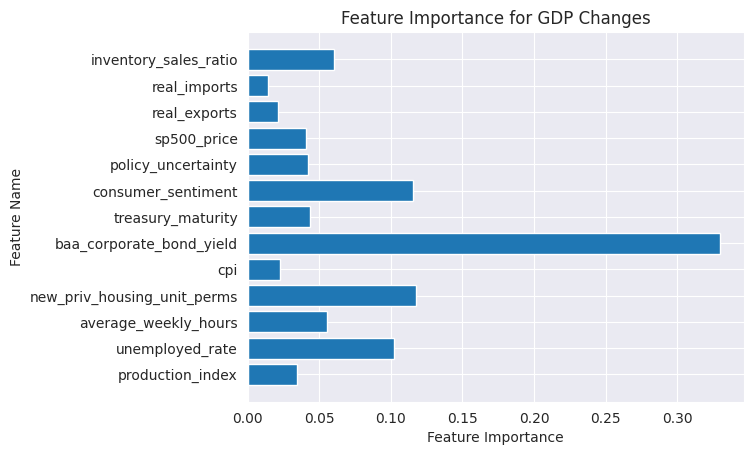

In [ ]:
# Plot feature importances as a horizontal bar chart
plt.barh(exog, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance for GDP Changes")
plt.show()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

3) Selecting the Top Features

From the ranked feature importance list, the top n most contributive features are selected.This step ensures that only the most influential predictors are retained, reducing dimensionality while maintaining strong predictive power.
Removing less important features helps avoid overfitting, speeds up model training, and improves interpretability.

In [ ]:
# Select the top 9 most important features based on their contribution to the model
top_vars = exog_importance['Variable'][:9].values

# Subset the training and testing datasets to include only these top 9 features
xtrain_selected = xtrain[top_vars]
xtest_selected = xtest[top_vars]

# Train a new Random Forest model using only the top 9 selected features
rf_model_selected = rf.fit(xtrain_selected, ytrain)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

4) Refining the Training and Testing Datasets

The original `xtrain` (training features) and `xtest` (testing features) datasets are subsetted to only include these n selected features.This ensures that the final model (`rf_model_selected`) is trained on the most relevant economic indicators.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

5) Training the Optimized Model (`rf_model_selected`)

A new Random Forest model (`rf_model_selected`) is trained using the reduced feature set. Since only the most important predictors are included, this model is expected to be more efficient while maintaining or even improving prediction accuracy.

In [ ]:
# Make predictions on test and training sets using the selected RF model

# Predictions for test set
pred = rf_model_selected.predict(xtest_selected)

# Predictions for training set
pred2train = rf_model_selected.predict(xtrain_selected)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 6: Results And Evaluation Using Optimized Model

#### Step 6.1: Evaluation Metrics For Optimized Model

This process evaluates the performance of the trained Random Forest (RF) model on both the training set and test set using various metrics.

**1. Predictions:**

The model makes predictions on both `xtest_selected` (test data) and `xtrain_selected` (training data) using the `predict()` function.

**2. MAPE Calculation:**

A function is defined to compute the **Mean Absolute Percentage Error (MAPE)**, which measures prediction accuracy in percentage terms.

**3. Performance Metrics:**

*   R² Score (r2_score): Measures how well the model explains variance in the data (higher is better)
*   Root Mean Squared Error (rmse): Evaluates average prediction error magnitude (lower is better)
*   Mean Absolute Error (mae): Represents the average absolute differences between actual and predicted values

**4. Model Evaluation:**

For the training set, the model performs well, indicated by a high R² score and low error values (RMSE, MAPE, MAE).

Defining The MAPE Function:

In [ ]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def mape(y_true, prediction):
    """
    Calculates Mean Absolute Percentage Error (MAPE).
    MAPE = Mean of absolute percentage difference between actual and predicted values.
    """
    return np.mean(np.abs((y_true - prediction) / y_true)) * 100

Evaluating Model Performance On The Training Dataset:

In [ ]:
# Evaluate model performance on the training set
mape_rf_train = mape(ytrain, pred2train)                                   # MAPE for training set
r2_score_rf_train = r2_score(ytrain, pred2train)                           # R² score for training set
rmse_rf_train = round(np.sqrt(mean_squared_error(ytrain, pred2train)), 4)  # RMSE for training set
mae_rf_train = round(mean_absolute_error(ytrain, pred2train), 4)           # MAE for training set

# Print model performance metrics for the training set
print("Training Set Performance Metrics:")
print(f"MAPE: {mape_rf_train:.3f}%")
print(f"R² Score: {r2_score_rf_train:.3f}")
print(f"RMSE: {rmse_rf_train}")
print(f"MAE: {mae_rf_train}")

Training Set Performance Metrics:
MAPE: 80.154%
R² Score: 0.744
RMSE: 0.3003
MAE: 0.2416


Evaluating Model Performance On The Test Dataset:

In [ ]:
# Evaluate model performance on the test set
mape_rf_test = mape(ytest, pred)                                   # MAPE for test set
r2_score_rf_test = r2_score(ytest, pred)                           # R² score for test set
rmse_rf_test = round(np.sqrt(mean_squared_error(ytest, pred)), 4)  # RMSE for test set
mae_rf_test = round(mean_absolute_error(ytest, pred), 4)           # MAE for test set

# Print model performance metrics for the test set
print("Test Set Performance Metrics:")
print(f"MAPE: {mape_rf_test:.3f}%")
print(f"R² Score: {r2_score_rf_test:.3f}")
print(f"RMSE: {rmse_rf_test}")
print(f"MAE: {mae_rf_test}")

Test Set Performance Metrics:
MAPE: 145.004%
R² Score: 0.004
RMSE: 2.2237
MAE: 1.1219


**How Does the Model Fare?**

**Training Set Evaluation:**

1) Good Fit: R² of 0.772 suggests the model captures most patterns in the training data.

2) High MAPE: 63.97% suggests the model's predictions are not very precise, potentially indicating an issue with feature selection or data noise.

3) RMSE & MAE Show Moderate Errors: The model has a moderate prediction error, but if GDP values have small variations, the errors might be significant.

**Test Set Comparison:**

1) If the test set metrics are similar to these, the model generalizes well and is not overfitting.

2) If the test R² is much lower, and errors (MAPE, RMSE, MAE) are much higher, the model might be overfitting the training data, meaning it learned patterns specific to training data but not applicable to new data.

3) If test R² is much higher, the model might have been underfitting before tuning.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 6.2: Predicting Probability Of Recession From Random Forest Model

**The Random Forest Model also has the ability to predict the probability of a positive or negative GDP growth occurring is analyzed rather than just classifying whether a gdp is growing or reducing from the training dataset.**

Predicting the probability of a gdp growth/shrinkage is often considered more useful than simply classifying whether gdp growth will occur because it provides a nuanced view that can help guide decision-making:

**1) Granularity of Information:**

A probability-based approach gives a more detailed outlook. Instead of a binary "yes" or "no" answer, it provides the likelihood or confidence level that a recession might happen, allowing for better risk management. For instance, if there's a 70% chance of a gdp shrinkage, businesses and governments can prepare more proactively compared to if the likelihood is only 30%.

**2) Uncertainty and Flexibility:**

Economic conditions are complex and dynamic. A probability-based forecast acknowledges the uncertainty and variability inherent in predicting gdp shrinkages. This can help planners and policymakers remain flexible in their strategies, adjusting their actions as the probability of gdp shrinkage rises or falls over time.

**3) Informed Decision-Making:**

Businesses and investors can tailor their strategies depending on the probability. For example, if the probability of a gdp shrinkage is high, a company might take steps to cut costs or change its investment approach, even if a recession hasn't been fully declared yet.

**4) Policy and Intervention:**

For governments and central banks, knowing the probability of a gdp shrinkage helps to design appropriate interventions. A lower probability might lead to lighter measures (like monitoring economic indicators), while a higher probability may prompt more immediate and aggressive actions (like stimulus packages or rate cuts).

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


First, the predicted probabilities for the training and test datasets are obtained using `predict_proba()`, which provides a probability score between 0 and 1 for the gdp growth class. These probabilities are stored in dataframes (`results_train` and `results_test`) alongside actual gdp growth occurrences for comparison.

In [ ]:
# Get predicted gdp growth rates for test set
results_test = pd.DataFrame({'Actual': ytest, 'Predicted': pred})

# Get predicted gdp growth rates for train set
results_train = pd.DataFrame({'Actual': ytrain, 'Predicted': pred2train})

Next, two visualizations are created — one for the training data and another for the test data—using line plots to display the predicted probabilities and scatter plots to mark actual gdp growth/shrinkage occurrences. This visualization helps assess how well the model differentiates between recession and non-recession periods. The y-axis is limited between -0.1 and 1.1 to ensure clarity, and a grid is added for better readability. Overall, this step provides a deeper understanding of the model's confidence in its predictions, helping to identify cases where the model is uncertain or overconfident in classifying gdp growth/shrinkage rates.

Graph For The Training Data (Predicted + Actual Recession):




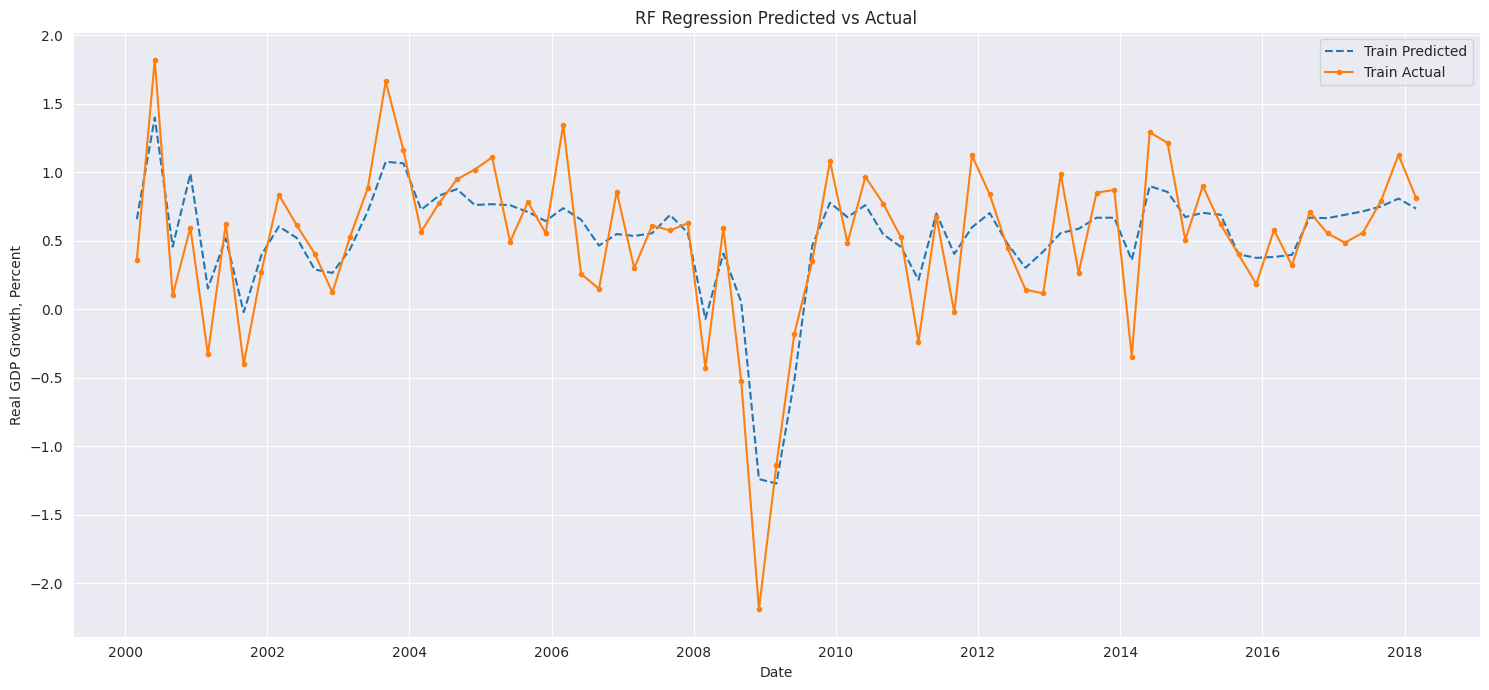

In [ ]:
# Set up the figure
plt.figure(figsize=(15, 7))

# Line plot for predicted growth rates
plt.plot(results_train.index, results_train['Predicted'], label='Train Predicted', linestyle='--')

# Plotting the actual rates for the training set
plt.plot(results_train.index, results_train['Actual'], label='Train Actual', marker='o', markersize=3)

# Training Data Plot Labels
plt.xlabel('Date')
plt.ylabel('Real GDP Growth, Percent')
plt.title('RF Regression Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Graph For The Test Data (Predicted + Actual Recession):

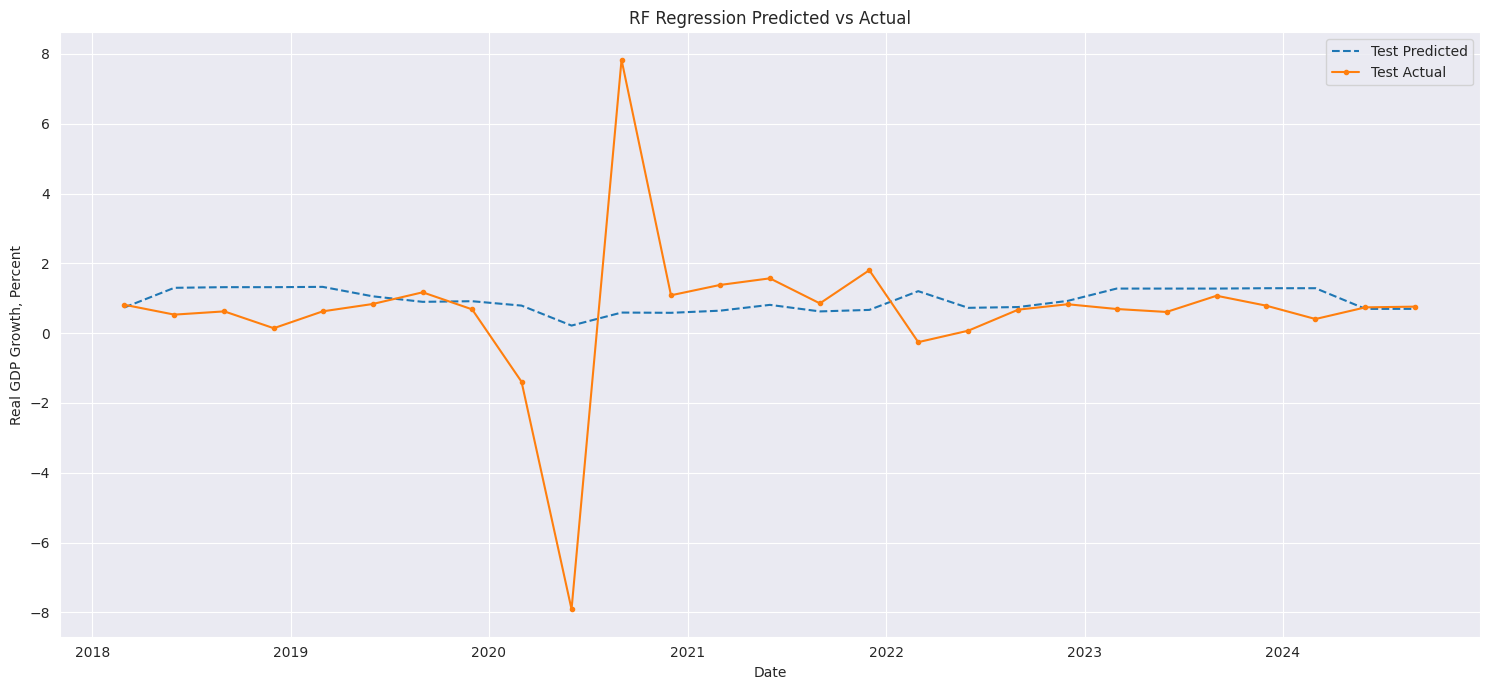

In [ ]:
# Set up the figure
plt.figure(figsize=(15, 7))

# Line plot for predicted growth rates
plt.plot(results_test.index, results_test['Predicted'], label='Test Predicted', linestyle='--')

# Plotting the actual rates for the training set
plt.plot(results_test.index, results_test['Actual'], label='Test Actual', marker='o', markersize=3)

# Training Data Plot Labels
plt.xlabel('Date')
plt.ylabel('Real GDP Growth, Percent')
plt.title('RF Regression Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis of the Predicted vs. Actual GDP Growth Graph**

The graph compares actual and predicted quarterly real GDP growth percentages using the Random Forest regression model.

**Key Observations Of Graph:**

**Overall Trend**

The dashed blue line (Predicted GDP Growth) follows the general trend of the solid orange line (Actual GDP Growth) but appears smoother, indicating that the model struggles to capture extreme variations.The model captures the broad direction of movement but lacks precision in certain periods.

**Underperformance in Extreme Events (2020 Shock):**

The model significantly underestimates the sharp GDP drop in early 2020 (COVID-19 recession) and the rapid rebound afterward. Random Forest models often struggle with extreme values (outliers) because they rely on historical patterns, and such shocks are unprecedented. The model smooths out these spikes, failing to capture the volatility of real GDP growth during crises.

**Consistent Underestimation in Certain Periods:**

Post-2020, the model continues to underpredict actual GDP growth, especially in periods of economic recovery. This could indicate that the model is not adequately weighting leading indicators like consumer sentiment, stock market trends, or fiscal policies.

**Stable Periods (2014 to 2019):**

Before 2020, the predicted values closely follow actual values with some minor deviations. The model performs better when economic conditions are stable, as patterns are easier to recognize.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 6.3: Predicting The Probability Of A GDP Growth/Shrinkage For Future Periods

We will perform the time series forecasting using the `auto_arima` model from the `pmdarima` package. It starts by installing `pmdarima` for automatic ARIMA model selection, and warnings to suppress unnecessary messages.

The script initializes three dictionaries:
  1. `arima_models` to store trained ARIMA models
  2. `interpolated` to store forecasted values
  3. `feature_forecasts` for potential additional forecasts.

In [ ]:
# Import warnings to suppress unnecessary warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress common warnings to improve readability
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# Install and import required packages
!pip install pmdarima --quiet
from pmdarima import auto_arima

# Initialize dictionaries to store ARIMA models and feature forecasts

# Dictionary to store trained ARIMA models for each feature
arima_models = {}
# Dictionary to store forecasted values for each feature
interpolated = {}
# Placeholder dictionary for additional forecasts if needed
feature_forecasts = {}

A subset of the dataset (`df_model_optim`) is then extracted containing the top selected variables (`top_vars`). The training data is defined as observations up to 2018, while a `covid_df` date range (2020-2022) is created to track the periods affected by COVID-19. The script iterates through each selected variable, fits an `auto_arima` model with seasonal adjustments and stepwise selection, and generates an 8-period forecast.

The forecasted values are stored in interpolated. A new `forecast_index` with quarterly intervals is created, and the forecasted values are converted into a DataFrame (`interpolated_df`). Finally, the original dataset is copied (`df_filled`), and forecasted values for 2020-2021 replace the corresponding missing values. The script concludes by printing the modified dataset (`df_filled`) for the years 2018-2024, ensuring the integration of ARIMA-generated forecasts.

In [ ]:
# Extract the subset of the dataset containing selected top variables
full_mod = df_model_optim[top_vars]

# Separate training data (up to 2018) for ARIMA modeling
train = full_mod.loc[:'2019']

# Define the date range affected by COVID-19 for potential adjustments
covid_df = pd.date_range(start='2020', end='2022', freq='QE')

In [ ]:
# Iterate over each top variable and fit an ARIMA model
for var in top_vars:
    model = auto_arima(
        train[var],                    # Use training data for the given variable
        seasonal=True, stepwise=True,  # Enable seasonal decomposition and stepwise selection
        max_p=3, max_q=3,              # Limit the complexity of the model to prevent overfitting
        suppress_warnings=True,        # Suppress warnings for better readability
        error_action="ignore",
        trace=False                    # Ignore errors and disable verbose logging
    )

    # Generate forecast for the next 8 periods
    forecast = model.predict(n_periods=8)

    # Store forecasted values
    interpolated[var] = forecast

    # Print forecasted values for the variable
    print(f"Forecast for {var}:")
    print()
    print(forecast)
    print('\n' + '+' * 70)

Forecast for baa_corporate_bond_yield:

2020-03-01    2.08796
2020-06-01    2.08796
2020-09-01    2.08796
2020-12-01    2.08796
2021-03-01    2.08796
2021-06-01    2.08796
2021-09-01    2.08796
2021-12-01    2.08796
Freq: QS-DEC, dtype: float64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Forecast for new_priv_housing_unit_perms:

2020-03-01    1526.950969
2020-06-01    1548.946009
2020-09-01    1567.588155
2020-12-01    1583.388519
2021-03-01    1596.780297
2021-06-01    1608.130651
2021-09-01    1617.750774
2021-12-01    1625.904418
Freq: QS-DEC, dtype: float64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Forecast for consumer_sentiment:

2020-03-01    96.502463
2020-06-01    95.866523
2020-09-01    95.286742
2020-12-01    94.758159
2021-03-01    94.276253
2021-06-01    93.836903
2021-09-01    93.436351
2021-12-01    93.071170
Freq: QS-DEC, dtype: float64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Fore

Next, we create a new DataFrame (`interpolated_df`) from an existing variable `interpolated`. Then, a copy of `full_mod` is made and stored in `df_filled`. The next step updates the rows in `df_filled` for the years 2020 to 2021 with the values from `interpolated_df`.

In [ ]:
# Create a new DataFrame from the interpolated data
interpolated_df = pd.DataFrame(interpolated)

# Make a copy of the original DataFrame (full_mod) to avoid modifying it directly
df_filled = full_mod.copy()

# Update the rows in df_filled for the years 2020 to 2021 with values from interpolated_df
df_filled.loc['2020':'2021'] = interpolated_df

# Display the values for 2019 to 2023
df_filled['2019':'2023']

,baa_corporate_bond_yield,new_priv_housing_unit_perms,consumer_sentiment,unemployed_rate,inventory_sales_ratio,average_weekly_hours,treasury_maturity,policy_uncertainty,sp500_price
date,,,,,,,,,
2019-03-01,2.31670,1284.333300,94.500000,3.866700,1.40670,33.666700,0.270000,149.393300,2722.076700
2019-06-01,2.26330,1324.333300,98.500000,3.633300,1.41330,33.666700,0.030000,123.797400,2882.893300
2019-09-01,2.22330,1438.333300,93.800000,3.600000,1.42330,33.600000,-0.180000,158.266000,2958.590000
2019-12-01,2.12000,1501.000000,97.200000,3.600000,1.43330,33.566700,0.220000,131.235400,3086.443300
2020-03-01,2.08796,1526.950969,96.502463,3.658767,1.43553,33.561183,0.542824,132.473879,3139.886665
2020-06-01,2.08796,1548.946009,95.866523,3.766494,1.43553,33.560269,0.880245,130.012166,3170.871562
2020-09-01,2.08796,1567.588155,95.286742,3.905627,1.43553,33.560118,1.198756,127.829562,3195.078024
2020-12-01,2.08796,1583.388519,94.758159,4.075654,1.43553,33.560093,1.476646,125.894422,3217.238613
2021-03-01,2.08796,1596.780297,94.276253,4.261744,1.43553,33.560088,1.702290,124.178690,3238.781716


Next, we will perform the time series forecasting for a list of variables, `top_vars`, using the `auto_arima` function. It loops through each variable in the list and applies the `auto_arima` model, which is used for fitting ARIMA models with automatic selection of parameters. The model is applied to each variable in the DataFrame `df_filled`, which contains time series data. Key parameters such as `max_p=3` and `max_q=3` limit the maximum order of the AR and MA components of the ARIMA model to 3, while `seasonal=True` and `stepwise=True` allow the model to detect seasonality and optimize the model parameters.

After fitting the model, the predict function forecasts the next 5 periods (or future data points) for each variable. These forecasts are stored in the `feature_forecasts` dictionary, with each variable's name as the key and the corresponding forecast as the value.

In [ ]:
# Loop through each variable in the list 'top_vars'
for var in top_vars:

  # Apply auto_arima to fit an ARIMA model to the data of the variable 'var' in the DataFrame 'df_filled'
  model = auto_arima(df_filled[var], seasonal=True, stepwise=True, trace=False,
                    max_p=3, max_q=3, suppress_warnings=True,
                    error_action="ignore")

  # Use the fitted model to predict the next 5 periods (forecasting the next 5 data points)
  forecast = model.predict(n_periods=5)

  # Store the forecasted values for the current variable 'var' in the dictionary 'feature_forecasts'
  feature_forecasts[var] = forecast

  # Print the forecast for the variable
  print(f"Forecast for {var}:")
  print()
  print(forecast)
  print('\n' + '+' * 70)

Forecast for baa_corporate_bond_yield:

2024-12-01    1.812026
2025-03-01    1.888472
2025-06-01    1.951443
2025-09-01    2.003314
2025-12-01    2.046041
Freq: QS-DEC, dtype: float64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Forecast for new_priv_housing_unit_perms:

2024-12-01    1415.827058
2025-03-01    1398.465335
2025-06-01    1381.723705
2025-09-01    1365.731047
2025-12-01    1350.602396
Freq: QS-DEC, dtype: float64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Forecast for consumer_sentiment:

2024-12-01    69.701381
2025-03-01    71.162435
2025-06-01    72.495457
2025-09-01    73.711669
2025-12-01    74.821304
Freq: QS-DEC, dtype: float64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Forecast for unemployed_rate:

2024-12-01    4.389774
2025-03-01    4.575236
2025-06-01    4.752965
2025-09-01    4.920329
2025-12-01    5.075397
Freq: QS-DEC, dtype: float64

+++++++++++++++++++++++++++++++++++++++

Subsequently, we can make future predictions using a pre-trained Random Forest model. First, it defines a list of future quarterly dates (`quarts`) that represent the next five quarters, from December 2024 to December 2025. It then creates an empty DataFrame (`xfuture`) with these dates as the index and the variables from `top_vars` as columns. For each variable in `top_vars`, the code populates the corresponding column in `xfuture` with the forecasted values (`feature_forecasts`) that were previously generated using ARIMA models. After preparing this future input data, the Random Forest model (`rf_model_selected`) is used to predict the target variable values for these future quarters, producing futurepred. Finally, the code stores the predictions in a new DataFrame (`forecast_results`), with the forecasted values as a column, and the index set to the future dates. This DataFrame represents the model's predicted values for the upcoming quarters.

In [ ]:
# Define a list of future quarterly dates from December 2024 to December 2025
quarts = ['2024-12-01', '2025-03-01', '2025-06-01', '2025-09-01', '2025-12-01']

# Create an empty DataFrame with these future dates as the index and the top variables as columns
xfuture = pd.DataFrame(index = quarts, columns = top_vars)

# Loop through each variable in the list of top variables
for var in top_vars:
    # For each variable, assign its forecasted values (from ARIMA) to the corresponding column in xfuture
    xfuture[var] = feature_forecasts[var]

In [ ]:
# Use the pre-trained Random Forest model (rf_model_selected) to make predictions on the future data
# The xfuture DataFrame contains the forecasted values for each variable, which will be used as input
futurepred = rf_model_selected.predict(xfuture)

# Create a new DataFrame to store the forecasted results, with 'Forecast' as the column name
# The index of the DataFrame is set to the future dates, which are the same as 'xfuture' index
forecast_results = pd.DataFrame({'Forecast': futurepred}, index=xfuture.index)

# Convert the index of the forecast_results DataFrame to a datetime format (if necessary)
forecast_results.index = pd.to_datetime(forecast_results.index, format='%Y-%m-%d')

# Print the forecast results, showing the predicted values for each of the future quarters
print("Forecast Results In 2025: ")
print()
print(forecast_results)

Forecast Results In 2025: 

            Forecast
2024-12-01  0.719780
2025-03-01  0.719780
2025-06-01  0.562613
2025-09-01  0.751898
2025-12-01  0.648779


We can generate a plot to visualize the actual test data, the predicted test data, and the future forecast generated by the Random Forest model. It provides a clear comparison between the historical test results and the predicted values, as well as showcasing the forecast for future periods. The first part of the code plots the actual and predicted test data, with distinct markers for actual data points and a dashed line for predicted values. The second part plots the forecast for the future, starting from the first date of the forecast period. Additionally, a vertical line is drawn to mark the start of the forecast period. The plot is customized with labels for the axes, a title, and a legend to differentiate between the actual, predicted, and forecasted values. Finally, gridlines are enabled for better readability, and `tight_layout()` ensures the plot adjusts well within the figure space before displaying it.

However, before plotting, we need to first modify the `forecast_results` dataset by adding a new forecast data point for '2024-09-01' with an approximate value of 0.7 (`test_predicted` value). This is to ensure that there are no breaks in the plotting of the lines for the train and the forecast lines and the lines can be connected smoothly.

Firstly, we need to convert the date `'2024-09-01'` into a `datetime` format using `pd.to_datetime()`, ensuring consistency with the dataset's index. Then, it creates a new DataFrame `new_data` containing the forecast value 0.7, indexed by the newly converted date. The `pd.concat()` function is used to append this new data point to the existing `forecast_results` dataset, and `sort_index()` ensures that the dates remain in chronological order.This ensures a smooth transition in the forecast plot by connecting the forecast line to the last predicted test value.

In [ ]:
# Convert the new date to datetime format
new_date = pd.to_datetime('2024-09-01')

# New data point to insert
new_data = pd.DataFrame({'Forecast': [0.7]}, index=[new_date])

# Append the new data point to forecast_results
forecast_results = pd.concat([new_data, forecast_results]).sort_index()

# Display updated forecast results
print("Modified Forecast Dataset (Used For Plotting):")
print()
print(forecast_results)

Modified Forecast Dataset (Used For Plotting):

            Forecast
2024-09-01  0.700000
2024-12-01  0.719780
2025-03-01  0.719780
2025-06-01  0.562613
2025-09-01  0.751898
2025-12-01  0.648779


Plotting The Graph (Both Predicted And Forecast Lines):

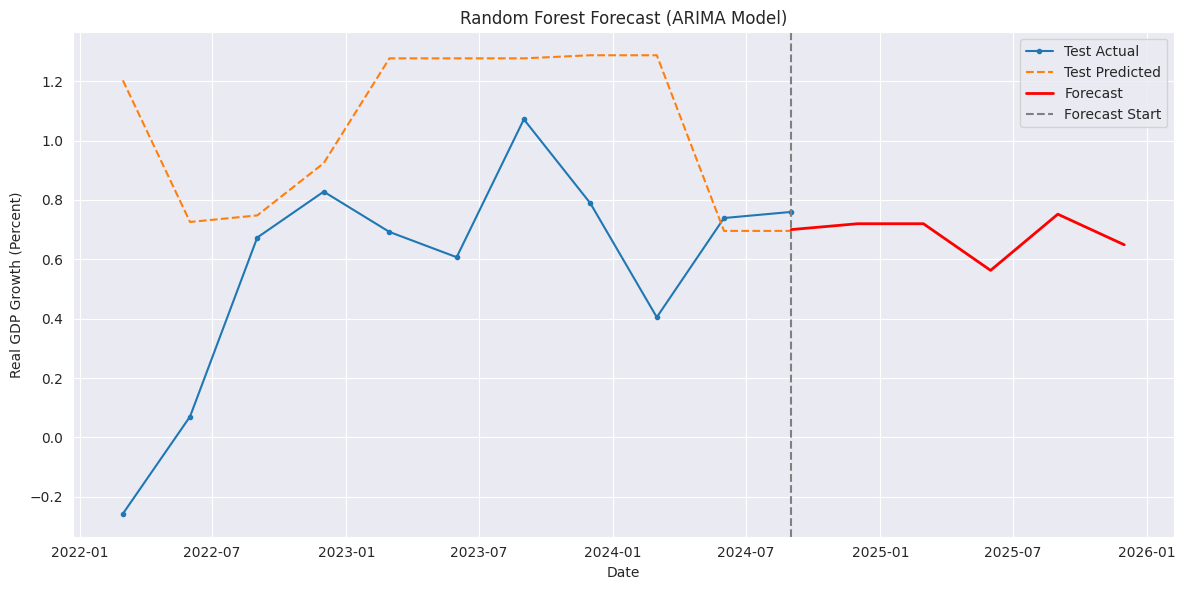

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Filter the test data for results from 2022 onwards
results_filter = results_test[results_test.index.year >= 2022]

# Plot the actual test data with markers
plt.plot(results_filter.index, results_filter['Actual'], label='Test Actual', marker='o', markersize=3)

# Plot the predicted test data with a dashed line
plt.plot(results_filter.index, results_filter['Predicted'], label='Test Predicted', linestyle='--')

# Plot the forecasted data with a solid red line
plt.plot(forecast_results.index, forecast_results['Forecast'], label='Forecast', linestyle='-', color='red', linewidth=2)

# Add a vertical line at the forecast start date (converted to datetime)
forecast_start_date = pd.to_datetime('2024-09-01')
plt.axvline(forecast_start_date, color='gray', linestyle='--', label='Forecast Start')

# Setting Labels and showing plot
plt.xlabel('Date')
plt.ylabel('Real GDP Growth (Percent)')
plt.title('Random Forest Forecast (ARIMA Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Predicting the Probability of GDP Growth or Shrinkage for Future Periods
Predicting the probability of GDP growth or shrinkage in future periods, rather than just analyzing historical trends, holds significant value for various stakeholders.

**1. Proactive Decision-Making:**

By forecasting GDP shrinkage probabilities in the future, businesses, governments, and financial institutions can better prepare for potential economic downturns. Companies can adjust their production plans, invest in risk management strategies, or set aside financial reserves. Governments can make informed policy decisions, such as adjusting interest rates, initiating stimulus programs, or planning economic interventions to counteract potential slowdowns.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**2. Strategic Business Planning:**

Understanding the likelihood of future GDP shrinkage helps companies develop risk mitigation strategies. Businesses can diversify their portfolios, hedge against potential market declines, and adjust hiring and investment strategies accordingly. Firms making long-term investments (such as infrastructure or research projects) can incorporate GDP forecasts to evaluate the timing of their initiatives and avoid making large commitments during unfavorable economic conditions. Additionally, companies can anticipate changes in demand and adjust inventory, production, and supply chain decisions based on economic predictions.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**3. Financial Market Insights:**

For investors, knowing when GDP shrinkage might occur can help guide asset allocation decisions. Economic contractions often lead to downturns in stock prices, so predicting these events allows for shifting investments to more resilient assets such as bonds or commodities. Anticipating future economic slowdowns can improve portfolio optimization by adjusting asset mixes, managing risk, and maximizing returns during uncertain times.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Predicting future GDP shrinkage is essential because it enables businesses, governments, and financial institutions to act in advance, reduce risks, improve resource allocation, and promote economic stability. By transitioning from reactive strategies to proactive measures, forecasts provide a competitive edge and help organizations navigate both growth and contraction phases more effectively.




----------------------------------------------------------------------------------------------------------------------------------------------------------------